## Build MRCNN Model -Load MRCNN and FCN weights - Load Training Files  

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint, pickle
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
import copy    
import numpy as np
import matplotlib.pyplot as plt
from matplotlib          import cm
import mrcnn.utils       as utils
import mrcnn.visualize   as visualize
import mrcnn.visualize  as vis
import mrcnn.visualize_2 as vis2
from mrcnn.prep_notebook import build_fcn_inference_pipeline_newshapes, build_fcn_evaluate_pipeline_newshapes
from mrcnn.prep_notebook import get_inference_batch, get_evaluate_batch, get_image_batch
from mrcnn.prep_notebook import run_mrcnn_detection, run_fcn_detection, run_fcn_evaluation
from mrcnn.newshapes     import prep_newshape_dataset
from mrcnn.visualize     import display_training_batch
import mrcnn.experiments as exp
import mrcnn.score_columns as sc

##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = utils.command_line_parser()
input_parms  =" --batch_size     1  "
input_parms +=" --dataset        newshapes2 "
input_parms +=" --mrcnn_logs_dir train_mrcnn "
input_parms +=" --fcn_logs_dir   train_fcn8L2_BCE1 " 
input_parms +=" --mrcnn_model    /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/"+ "mrcnn_0020.h5 "
input_parms +=" --fcn_model      /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/" + "fcn_0089.h5"
input_parms +=" --fcn_arch       fcn8l2 " 
input_parms +=" --sysout         screen "
input_parms +=" --evaluate_method 3"
input_parms +=" --scale_factor    1"
args = parser.parse_args(input_parms.split())
# utils.display_input_parms(args)

# CLASS_COLUMN        = 4
# ORIG_SCORE_COLUMN   = 5
# DT_TYPE_COLUMN      = 6
# SEQUENCE_COLUMN     = 7
# NORM_SCORE_COLUMN   = 8    
# SCORE_0_SUM_COLUMN  = 9
# SCORE_0_AREA_COLUMN = 10
# SCORE_0_COLUMN      = 11
# SCORE_1_SUM_COLUMN  = 12
# SCORE_1_AREA_COLUMN = 13
# SCORE_1_COLUMN      = 14 
# SCORE_1_NORM_COLUMN = 17
# SCORE_2_SUM_COLUMN  = 18
# SCORE_2_AREA_COLUMN = 19
# SCORE_2_COLUMN      = 20
# SCORE_2_NORM_COLUMN = 23

Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks
appending '..' to sys.path


Using TensorFlow backend.


 Init Image Class - Possible Object Choices:  {'cloud': 3, 'airplane': 3, 'person': 5, 'car': 3, 'tree': 5, 'sun': 1, 'building': 3, 'truck': 3}
 Init Image Class - Custom Color Keys      :  ['sky', 'person', 'cloud', 'ground', 'tree', 'sun']
 Init Image Class - Object Priority List   :  ['building', 'tree', 'car']
 Init Image Class - BUILD_MAX_TRIES        :  7
 Init Image Class - PERSON_CAR_DISTANCE    :  10


### 2019-05-13 : We may run in evaluation mode. Here is why:

We run in evaluation mode to bypass the MRCNN detection on objects. When in eval mode, the detection is constructed based on what GT we have passed to the 
detector. In evaluation_mode 3, we assign 0.5 as the score. In other words, the detector is unable to make a confident decision on the object.

In [2]:
mrcnn_model, fcn_model = build_fcn_inference_pipeline_newshapes(args = args)
# mrcnn_model, fcn_model = build_fcn_evaluate_pipeline_newshapes(args = args)

MODE IS: inference

--> Execution started at: 06-15-2019 @ 09:50:31
    Tensorflow Version: 1.8.0   Keras Version : 2.1.6 
    Build_mrcnn_inference_pipeline_newshapes MODE is : inference

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   dataset                        newshapes2
   epochs                         1
   evaluate_method                3
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['fcn32+']
   fcn_logs_dir                   train_fcn8L2_BCE1
   fcn_losses                     fcn_BCE_loss
   fcn_model                      /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0089.h5
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir             


 
---------------------------------------------
>>> FCN Scoring Graph  - mode: inference
---------------------------------------------

 
---------------------------------------------
>>> FCN Scoring Graph  - mode: inference
---------------------------------------------

>>> FCN build complete. mode:  inference
>>> FCN initialization complete. mode:  inference

 FCN Configuration Parameters 
 ------------------------------ 

FCN Configuration Parameters:
-----------------------------
BACKBONE_SHAPES                [[32 32]
 [16 16]
 [ 8  8]
 [ 4  4]
 [ 2  2]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        64
DETECTION_MIN_CONFIDENCE       0.1
DETECTION_NMS_THRESHOLD        0.3
DETECTION_PER_CLASS            64
DIR_DATASET                    /home/kbardool/MLDatasets/newshapes2
DIR_PRETRAINED                 /home/kbardool/PretrainedModels
DIR_TRAINING                   /

## Load MRCNN  and FCN Weights

In [4]:
# MRCNN_DIR_WEIGHTS =  'F:/models_newshapes/train_mrcnn_newshapes/mrcnn20181216T0000'
MRCNN_DIR_WEIGHTS = '/home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000'
# files = ['fcn_0001.h5','fcn_0027.h5','fcn_0036.h5','fcn_0051.h5','fcn_0076.h5','fcn_0106.h5','fcn_0156.h5']
# files   = ['fcn_0104.h5','fcn_0150.h5','fcn_0205.h5','fcn_0249.h5','fcn_0293.h5','fcn_0346.h5','fcn_0419.h5']
mrcnn_files   = ['mrcnn_0001.h5', 'mrcnn_0020.h5', 'mrcnn_0041.h5', 'mrcnn_0060.h5',
                 'mrcnn_0092.h5', 'mrcnn_0116.h5', 'mrcnn_0154.h5', 'mrcnn_0174.h5',
                 'mrcnn_0201.h5', 'mrcnn_0223.h5', 'mrcnn_0243.h5', 'mrcnn_0332.h5']

In [30]:
MRCNN_FILE_IDX = -2
mrcnn_weights_file = os.path.join(MRCNN_DIR_WEIGHTS  , mrcnn_files[MRCNN_FILE_IDX])
print("Loading weights ", mrcnn_weights_file)
mrcnn_model.load_model_weights(mrcnn_weights_file)

Loading weights  /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0243.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0243.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0243.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0243.h5 
MRCNN  MODEL Load weight file COMPLETE 


In [6]:
# FCN_DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
FCN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000'

fcn_files  = ['fcn_0001.h5', 'fcn_0002.h5', 'fcn_0003.h5', 'fcn_0004.h5', 
              'fcn_0005.h5', 'fcn_0006.h5', 'fcn_0008.h5', 'fcn_0009.h5', 
              'fcn_0012.h5', 'fcn_0016.h5', 'fcn_0018.h5', 'fcn_0019.h5', 
              'fcn_0021.h5', 'fcn_0022.h5', 'fcn_0023.h5', 'fcn_0024.h5', 
              'fcn_0033.h5', 'fcn_0039.h5', 'fcn_0042.h5', 'fcn_0044.h5', 
              'fcn_0077.h5', 'fcn_0089.h5', 'fcn_0170.h5', 'fcn_0177.h5',
              'fcn_0253.h5', 'fcn_0266.h5']  ## 22,23,24,25


# fcn_files = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
#              'fcn_0450.h5', 'fcn_0482.h5', 'fcn_0521.h5', 'fcn_0610.h5',
#              'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5',
#              'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5',
#               'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5', 'fcn_x0434.h5', 'fcn_x0419.h5']

In [7]:
FILE_IDX = -1
fcn_weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
print("Loading weights ", fcn_weights_file)
fcn_model.load_model_weights(fcn_weights_file)

Loading weights  /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 
FCN  MODEL Load weight file COMPLETE 


## Load test dataset

In [3]:
# del dataset_train, dataset_val, train_generator, val_generator
# dataset_test , test_generator   = prep_newshape_dataset( mrcnn_model.config,  1000, generator=True)
# with open('newshapes_dataset_1000_B.pkl', 'wb') as outfile:
#     pickle.dump(dataset_test, outfile)
## -- OR --

# with open(os.path.join(mrcnn_model.config.DIR_DATASET,"newshapes2_test_dataset_1000_A.pkl"), 'rb') as infile:

with open(os.path.join("/home/kbardool/MLDatasets/newshapes2","newshapes2_test_dataset_1000_A.pkl"), 'rb') as infile:
    dataset_test = pickle.load(infile)
print(type(dataset_test))    

dataset_test.display_active_class_info()
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
print(len(dataset_test.image_ids))    
class_names = dataset_test.class_names

<class 'mrcnn.newshapes2.NewImagesDataset'>
 Active Class Information 
--------------------------
[1, 2, 3, 4, 5, 6, 7, 8]
internal_class:  1 ext_cls: 1 category-name: None - person
internal_class:  2 ext_cls: 2 category-name: None - car
internal_class:  3 ext_cls: 3 category-name: None - sun
internal_class:  4 ext_cls: 4 category-name: None - building
internal_class:  5 ext_cls: 5 category-name: None - tree
internal_class:  6 ext_cls: 6 category-name: None - cloud
internal_class:  7 ext_cls: 7 category-name: None - airplane
internal_class:  8 ext_cls: 8 category-name: None - truck
Testing Dataset Image Count: 1000
Testing Dataset Class Count: 9
1000


###  Display some images from dataset

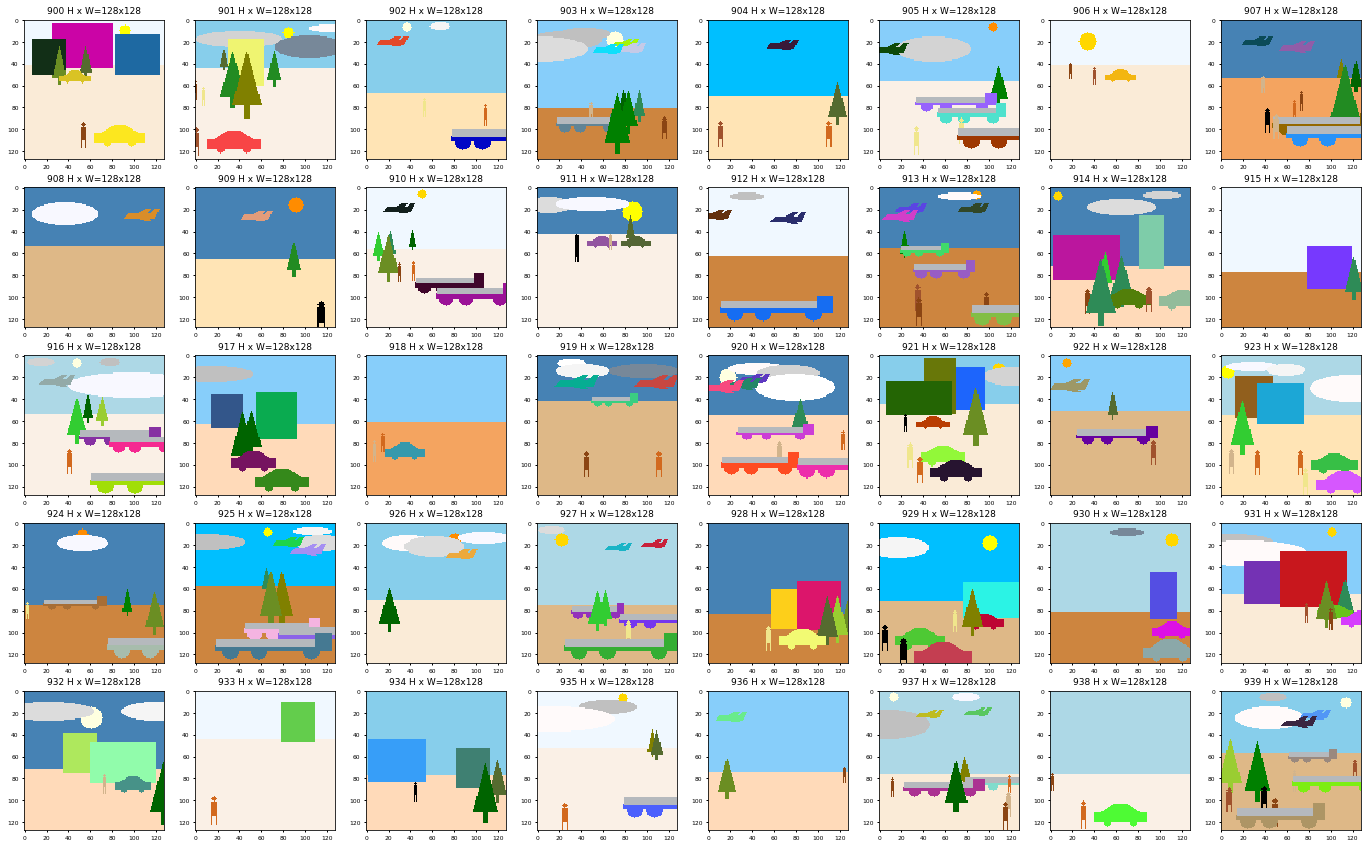

In [4]:
# image_list = list(range(160,200))
image_list = list(range(900,940))
image_titles = [str(i) for i in image_list]
images = get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

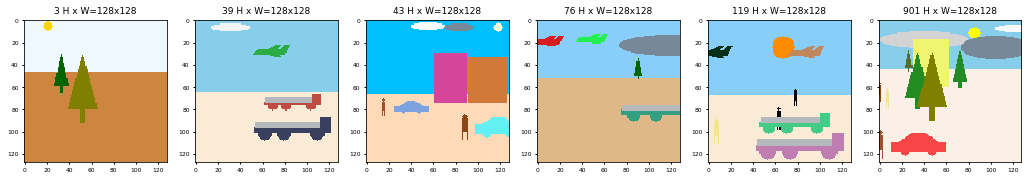

In [5]:
# image_list = list(range(160,200))
# image_list = list(range(0, 80))
image_list = [37, 131, 421, 468, 206 , 18, 29, 67, 72, 74, 77, 79, 176]
image_list = [3,39,43,76,119,901]
image_titles = [str(i) for i in image_list]

images = get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

## Evaluate indiviual image


GT_BOXES for image  79
--------------------------------------------------------------------------------
        class             |                              
seq  id name              |  Y1  X1  Y2  X2     CX     CY    AREA
--------------------------------------------------------------------------------
  0  2 car                |  56  48  71  81    64.5   63.5   495.00



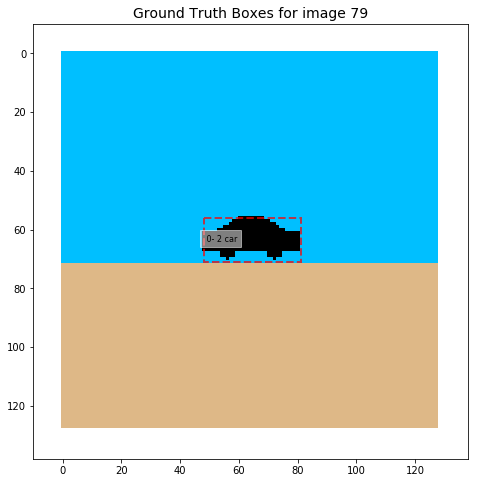

In [33]:
image_id = 79
cols = 8
classes = [1,2,3,4,5,6,7,8]
# vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
vis2.display_gt_bboxes(dataset_test, dataset_test.config, image_id, size=8, verbose = True)

# r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

In [34]:
vis2.display_pr_fcn_scores(r[0], class_names)



PR_SCORES from fcn/mrcnn_results:   (top line MRCNN, bottom line FCN) 
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                              |   |                |     MRCNN / FCN score 0    |         MRCNN / FCN score 1        |        MRCNN / FCN score 2         | 
          class               |TP/| mrcnn  normlzd |  gaussian   bbox   nrm.scr*|  ga.sum    mask     score   norm   |  ga.sum    mask     score   norm   | 
    seq  id name              | FP| score   score  |    sum      area   gau.sum |  in mask   sum              score  |  in mask   sum              score  |  Y1  X1  Y2  X2   AREA  
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  0  64  7 airplane           | 1 | 0.9133  1.0000 |   0.9720   270.0    0.9720 

In [49]:
print(r[0]['fcn_scores'])
for i in r[0]['fcn_scores'][::-1]:
    print(i)

[[   58.0000    49.0000    68.0000    76.0000     7.0000     0.9133     1.0000    64.0000     1.0000  -171.9358   270.0000  -171.9358    15.8372    40.0000     0.3959     1.0000     1.0000
      1.0000    18.5916    40.0000     0.4648     1.0000     1.0000     1.0000]
 [   56.0000    51.0000    73.0000    78.0000     2.0000     0.7152     1.0000    63.0000     1.0000  -265.1035   459.0000  -265.1035    35.4460    48.0000     0.7385     1.0000     1.0000
      1.0000    25.6721    48.0000     0.5348     1.0000     1.0000     1.0000]
 [   49.0000    46.0000    76.0000    74.0000     4.0000     0.2843     1.0000    62.0000     1.0000  -587.3665   756.0000  -587.3665   -48.8447    64.0000    -0.7632     0.0000     1.0000
      0.0000   -48.8447    64.0000    -0.7632     0.0000     1.0000     0.0000]]
[   49.0000    46.0000    76.0000    74.0000     4.0000     0.2843     1.0000    62.0000     1.0000  -587.3665   756.0000  -587.3665   -48.8447    64.0000    -0.7632     0.0000     1.0000
    

PR_SCORES from fcn/mrcnn_results:
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                              |   |                |        MRCNN score 0       |          MRCNN score 1             |           MRCNN score 2            |                         
          class               |TP/| mrcnn  normlzd |  gaussian   bbox   nrm.scr*|  ga.sum    mask     score   norm   |  ga.sum    mask     score   norm   |                         
    seq  id name              | FP| score   score  |    sum      area   gau.sum |  in mask   sum              score  |  in mask   sum              score  |  X1  Y1  X2  Y2   AREA  
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  0  64  7 airplane           | 1 | 0.9847  1.0000 |   0.9322   182.0  

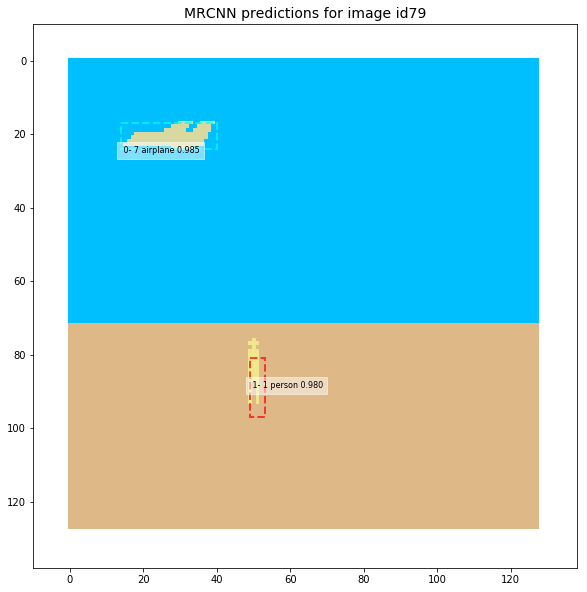

In [13]:
only = None
# only = [2]
vis2.display_pr_scores(r[0], class_names, display = True, size = 10,  only = only)
# vis2.display_pr_hm_scores(r[0], class_names, only = None)
# vis2.display_pr_hm_scores_box_info(r[0], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names, only = only)

In [50]:
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_fcn_scores_box_info2(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)

  FCN BBox Information - classes   --  :  [3, 7]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                         |                                                 |    (COVAR)    |               CLIP REGION   
BOX     class                                            |                   Width   Height                |      SQRT     |      FROM/TO               FROM/TO 
seq  id     name              Y1/X1              Y2/X2   |    CX / CY         (W)  ~  (H)      AREA        |  W/2     H/2  |  X1/Y1    X2/Y2   A |  X1/Y1   X2/Y2   A
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 57   3 sun             ( 20.00, 56.00)  ( 32.00, 74.00) |  65.00/ 26.00    18.00~  12.00   216.00   30.00 |   3.00   

In [ ]:
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8, classes = classes)

##  Manipulate some images to test contextual relationships

|Exp |Image     | Original Image | modifications |Conxtextual experiment
|----| :------- |:-------------- | :-------------|:------------------------------------------------------------------ 
| 1 | Image 18 | sun and truck | Remove sun, add building |  move truck around with and without a building present in the image
| 2 | image 67 | Buildings and car|                    | If we move a person around the activation "should" peak when it's in proper position with regards to the car.
| 3 | image 67 | Buildings and car| Remove all objects | and move an object of each class around in black, and in color. 
| 4 | Image 72 | sun and airplane | Remove sun         | move a car around the image, and move a truck around the image , comparing the results. Moving a truck should invoke higher activation than a car, since the cars do not cooccur with an airplane
| 5 | Image 77 | Sun, Airplane    | Remove sun         | move airplane around with and and without a building present in the scene. The activation strength should increase when the building is absent
| 6 | Image 79 | Person, plane | Remove the plane | move a car around the image. Activation of the car should peak when it's in propoer position with regards to the person
| 7 | image 176| 2 persons, tree, car| Remove tree and persons | move a airplane around (car and airplane dont occur in same image - so the relatvie activation strength of the airplane, in proper position, should be higher when thecar is absent from the image
    
    - The max FCN activation of the person is close to the car
 

####  Objects to add / remove from image s

In [ ]:
## image 77: [('sun', (255.0, 215.0, 0.0), (49, 13, 6, 6)), ('airplane', (200.0, 132.0, 126.0), (25, 23, 18, 7))]
## image 27 : [ ('sun', (255.0, 255.0, 224.0), (87, 16, 7, 7)),   ('building', (7.0, 9.0, 197.0), (92, 60, 24, 20)),   ('person', (210.0, 105.0, 30.0), (124, 107, 2, 11))]

# del dataset_test.image_info[image_id]['shapes'][0:2]
# black_car  = ('car', black, (cx, cy, 15, 7))
# black_car = ('car', (0.0, 0.0, 0.0),(64,64, 15, 7))
# person = ('person', (139.0, 69.0, 19.0), (17, 92, 2, 10))
## person = ('person', (240.0, 230.0, 140.0), (40, 92, 2, 10))
## black_sun = ('sun', (0.0, 0.0, 0.0), (7, 9, 4, 4))
building  =  ('building', (7.0, 9.0, 197.0), (92, 60, 24, 20))
airplane  = ('airplane', (200.0, 132.0, 126.0), (25, 23, 18, 7))
car       = ('car', (150.0, 174.0, 8.0), (87, 112, 22, 11))
truck     = ('truck', (213.0, 56.0, 119.0), (80, 93, 39, 13))
truck     = ('truck', (83.0, 192.0, 78.0), (65, 71, 25, 8))
tree      = ('tree', (50.0, 205.0, 50.0), (100, 91, 12, 28))
cloud     = ('cloud', (192.0, 192.0, 192.0), (106, 20, 34, 8))
sun       = ('sun', (255.0, 140.0, 0.0), (66, 18, 7, 7)),

[ ('sun', (255.0, 215.0, 0.0), (57, 12, 5, 5)),
  ('cloud', (220.0, 220.0, 220.0), (99, 6, 12, 3)),
  ('cloud', (220.0, 220.0, 220.0), (116, 26, 44, 11)),
  ('airplane', (88.0, 6.0, 166.0), (40, 22, 16, 6)),
  ('airplane', (193.0, 172.0, 166.0), (51, 25, 16, 6)),
  ('tree', (128.0, 128.0, 0.0), (93, 81, 8, 18)),
  ('person', (240.0, 230.0, 140.0), (101, 95, 1, 10)),
  ('truck', (101.0, 98.0, 151.0), (46, 101, 33, 11))]
 Image_id    :  11  Reference:  [('sun', (255.0, 215.0, 0.0), (57, 12, 5, 5)), ('cloud', (220.0, 220.0, 220.0), (99, 6, 12, 3)), ('cloud', (220.0, 220.0, 220.0), (116, 26, 44, 11)), ('airplane', (88.0, 6.0, 166.0), (40, 22, 16, 6)), ('airplane', (193.0, 172.0, 166.0), (51, 25, 16, 6)), ('tree', (128.0, 128.0, 0.0), (93, 81, 8, 18)), ('person', (240.0, 230.0, 140.0), (101, 95, 1, 10)), ('truck', (101.0, 98.0, 151.0), (46, 101, 33, 11))] Coco Id: 11
 Image meta  :  [    11    128    128      3      0      0    128    128      1      1]
 Class ids   :  (8,)    [     3      

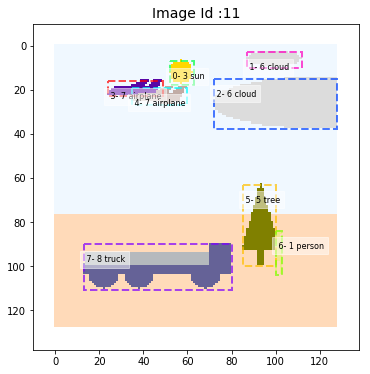

In [161]:
# pp.pprint(dataset_test.image_info[20]['shapes'])
show_id = 11
pp.pprint(dataset_test.image_info[show_id]['shapes'])
vis.display_image_gt(dataset_test, dataset_test.config, show_id, size=6, verbose = True)

## Helper functions 

In [6]:
np_format = {'float': lambda x: "%10.4f" % x, 'int': lambda x: "%8d" % x}
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format), 

(None,)

### Load weight file

In [6]:
# MRCNN_DIR_WEIGHTS =  'F:/models_newshapes/train_mrcnn_newshapes/mrcnn20181216T0000'
MRCNN_DIR_WEIGHTS = '/home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000'
# files = ['fcn_0001.h5','fcn_0027.h5','fcn_0036.h5','fcn_0051.h5','fcn_0076.h5','fcn_0106.h5','fcn_0156.h5']
# files   = ['fcn_0104.h5','fcn_0150.h5','fcn_0205.h5','fcn_0249.h5','fcn_0293.h5','fcn_0346.h5','fcn_0419.h5']
mrcnn_files   = ['mrcnn_0001.h5', 'mrcnn_0020.h5', 'mrcnn_0041.h5', 'mrcnn_0060.h5',
                 'mrcnn_0092.h5', 'mrcnn_0116.h5', 'mrcnn_0154.h5', 'mrcnn_0174.h5',
                 'mrcnn_0201.h5', 'mrcnn_0223.h5', 'mrcnn_0243.h5', 'mrcnn_0332.h5']

MRCNN_FILE_IDX = 1
mrcnn_weights_file = os.path.join(MRCNN_DIR_WEIGHTS  , mrcnn_files[MRCNN_FILE_IDX])
print("Loading weights ", mrcnn_weights_file)
mrcnn_model.load_model_weights(mrcnn_weights_file)

Loading weights  /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0020.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0020.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0020.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0020.h5 
MRCNN  MODEL Load weight file COMPLETE 


In [7]:
# FCN_DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
# fcn_files = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
#              'fcn_0450.h5', 'fcn_0482.h5', 'fcn_0521.h5', 'fcn_0610.h5',
#              'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5',
#              'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5',
#               'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5', 'fcn_x0434.h5', 'fcn_x0419.h5']
FCN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000'
fcn_files  = ['fcn_0001.h5', 'fcn_0002.h5', 'fcn_0003.h5', 'fcn_0004.h5', 
              'fcn_0005.h5', 'fcn_0006.h5', 'fcn_0008.h5', 'fcn_0009.h5', 
              'fcn_0012.h5', 'fcn_0016.h5', 'fcn_0018.h5', 'fcn_0019.h5', 
              'fcn_0021.h5', 'fcn_0022.h5', 'fcn_0023.h5', 'fcn_0024.h5', 
              'fcn_0033.h5', 'fcn_0039.h5', 'fcn_0042.h5', 'fcn_0044.h5', 
              'fcn_0077.h5', 'fcn_0089.h5', 'fcn_0170.h5', 'fcn_0177.h5',
              'fcn_0253.h5', 'fcn_0266.h5']  ## 22,23,24,25
FILE_IDX = -1
fcn_weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
print("Loading weights ", fcn_weights_file)
fcn_model.load_model_weights(fcn_weights_file)

Loading weights  /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 
FCN  MODEL Load weight file COMPLETE 


### Display objects across a number of images - to get an idea about dimensions

In [8]:
for i in range(100,400):
    for obj in dataset_test.image_info[i]['shapes']:
        if obj[0] == 'car' : # and obj[2][2] ==26 :
            print(' image id:  {} ,   sx/sy: {:2d}/{:2d}'.format(obj[0],obj[2][2],obj[2][3]))

 image id:  car ,   sx/sy: 21/10
 image id:  car ,   sx/sy: 23/11
 image id:  car ,   sx/sy: 24/12
 image id:  car ,   sx/sy: 13/ 6
 image id:  car ,   sx/sy: 25/12
 image id:  car ,   sx/sy: 18/ 9
 image id:  car ,   sx/sy: 26/13
 image id:  car ,   sx/sy: 21/10
 image id:  car ,   sx/sy: 17/ 8
 image id:  car ,   sx/sy: 24/12
 image id:  car ,   sx/sy: 14/ 7
 image id:  car ,   sx/sy: 18/ 9
 image id:  car ,   sx/sy: 19/ 9
 image id:  car ,   sx/sy: 19/ 9
 image id:  car ,   sx/sy: 23/11
 image id:  car ,   sx/sy: 19/ 9
 image id:  car ,   sx/sy: 19/ 9
 image id:  car ,   sx/sy: 19/ 9
 image id:  car ,   sx/sy: 23/11
 image id:  car ,   sx/sy: 25/12
 image id:  car ,   sx/sy: 21/10
 image id:  car ,   sx/sy: 17/ 8
 image id:  car ,   sx/sy: 21/10
 image id:  car ,   sx/sy: 19/ 9
 image id:  car ,   sx/sy: 18/ 9
 image id:  car ,   sx/sy: 20/10
 image id:  car ,   sx/sy: 22/11
 image id:  car ,   sx/sy: 24/12
 image id:  car ,   sx/sy: 18/ 9
 image id:  car ,   sx/sy: 19/ 9
 image id:

In [9]:
dixt = {}

# for sx in range(9,80):
for sx in ['person', 'car', 'sun', 'building', 'tree', 'cloud', 'airplane', 'truck']:
    cal = []
    cx = []
    cy = []
    for i in range(1000):
        for obj in dataset_test.image_info[i]['shapes']:
            if obj[0] == sx:
                cx.append(obj[2][0])
                cy.append(obj[2][1])
    #                 print(' image id:  {} ,   sx/sy: {:2d}/{:2d}'.format(obj[0],obj[2][2],obj[2][3]))
    #     dixt[sx] = cal
    if len(cx) == 0 :
        print('sx: ',sx , 'cal : ', len(cal))
    else:
    #         print('sx: ',sx , 'cal : ', len(cal), ' min : ', np.min(cal), ' max :  ', np.max(cal), ' avg: ', np.mean(cal))
#         print('sx: ',sx , 'cal : ', len(cal), ' min/max(cx) : ', np.min(cx),np.max(cx), ' min/max(cy):  ', np.min(cy), np.max(cy), ' avg: ', np.mean(cx), np.mean(cy))
        print('sx: {:15s}   cal :{:3d}    min/max(cx): {:3d} {:3d}   min/max(cy): {:3d} {:3d}   avg: {:4.2f} {:4.2f}  {:4.2f} '.
              format(sx, len(cal),np.min(cx),np.max(cx), np.min(cy), np.max(cy),np.mean(cx), np.mean(cy), np.median(cy)))

sx: person            cal :  0    min/max(cx):   0 128   min/max(cy):  45 122   avg: 53.13 96.67  99.00 
sx: car               cal :  0    min/max(cx):  25 128   min/max(cy):  45 122   avg: 77.24 97.69  100.00 
sx: sun               cal :  0    min/max(cx):   6 121   min/max(cy):   6  25   avg: 60.59 15.06  15.00 
sx: building          cal :  0    min/max(cx):  20 108   min/max(cy):  19  82   avg: 63.43 51.20  51.00 
sx: tree              cal :  0    min/max(cx):   0 128   min/max(cy):  33  98   avg: 63.61 68.99  69.00 
sx: cloud             cal :  0    min/max(cx):   0 128   min/max(cy):   6  31   avg: 66.30 16.90  16.00 
sx: airplane          cal :  0    min/max(cx):  10 117   min/max(cy):  20  32   avg: 63.29 25.83  26.00 
sx: truck             cal :  0    min/max(cx):  31 128   min/max(cy):  42 121   avg: 87.18 90.29  91.00 


##  Image 79 (29) - Moving objects horizontially across image in different scales

In [40]:
save_path = "/home/kbardool/git_projs/mrcnn3/train_newshapes_2/other"
epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
mrcnn_epochs = mrcnn_files[MRCNN_FILE_IDX].split('_')[1].replace('.h5','')

exp_prfx = 'exp7'
exp_desc = dataset_test.image_info[image_id]['shapes'][0][0]
save_file =  exp_prfx+'_i'+str(image_id)+'_e'+epochs+'_m'+mrcnn_epochs+'_'+exp_desc+'.npz'
print(' SAVED FILENAME:', save_file)

 SAVED FILENAME: exp7_i79_e0266_m0020_sun.npz


In [177]:
image_id = 79
# vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
print(dataset_test.image_info[image_id])

{'height': 128, 'horizon': (72, 72, array([  0., 191., 255.])), 'ground': (72, 72, array([222., 184., 135.])), 'id': 79, 'width': 128, 'path': None, 'bg_color': array([243,  42, 162], dtype=int32), 'shapes': [('tree', (0.0, 0.0, 0.0), (126, 69, 12, 29))], 'source': 'newshapes2'}


[('person', (240.0, 230.0, 140.0), (50, 86, 2, 10))]
 Image_id    :  79  Reference:  [('person', (240.0, 230.0, 140.0), (50, 86, 2, 10))] Coco Id: 79
 Image meta  :  [ 79 128 128   3   0   0 128 128   1   1]
 Class ids   :  (1,)    [1]
 Class Names :  ['person']


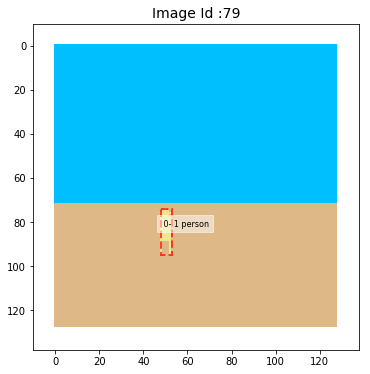

In [19]:
image_id = 79
# new_obj = ('car', (150.0, 174.0, 8.0), (cx, cy, 22, 11))     ## image 79 - move car around 
# new_obj = ('sun', (0.0, 0.0, 0.0), (cx, cy, 4, 4))             ## image 18  - moving sun - black
# new_obj = ('sun', (255.0, 215.0, 0.0), (cx, cy, 4, 4))         ## image 18 - moving sun - color
# new_obj = ('building', (0.0, 0.0, 0.0), (cx, cy, 16, 16))      ## image 67 - moving building
# new_obj = ('airplane', (0.0, 0.0, 0.0), (cx, cy, 16, 6))       ## image 67 - moving airplane - black
# new_obj = ('airplane', (215.0, 217.0, 161.0), (cx, cy, 16, 6)) ## image 67 - moving airplane - color
# new_obj = ('sun', (0.0, 0.0, 0.0), (cx, cy, 6, 6))             ## image 67 - moving sun - color
# new_obj = ('sun', (255.0, 215.0, 0.0), (cx, cy, 6, 6))         ## image 67 - moving sun - color
# new_obj = ('airplane', (200.0, 132.0, 126.0), (cx, cy, 18, 7))       ## IMAGE 77 - moving airplane color
# new_obj = ('car', (200.0, 132.0, 126.0), (cx, cy, 16, 7))          ## IMAGE 77 - moving car color
# new_obj = ('truck', (83.0, 192.0, 78.0), (65, 71, 25, 8))    ## image 77 - moving truck
# car_2black= ('car'   ,black, (60, cy, 20, 10))
# car_2black= ('car'   ,black , (60, cy, 16, 8))   ## SMALL CAR
# person    = ('person', (139.0, 69.0, 19.0)  , (cx , cy,  2, 12))
# person    = ('person', white  , (cx , cy,  2, 12))
# truck = ('truck', (150.0, 174.0, 8.0), (95, 93, 23, 11))
# airplane = ('airplane', (200.0, 132.0, 126.0), (25, 23, 18, 7))


### Image 79 orig objects : [('airplane', (215.0, 217.0, 161.0), (31, 23, 16, 6)), ('person', (240.0, 230.0, 140.0), (50, 86, 1, 9))]
# new_obj = ('airplane', (215.0, 217.0, 161.0), (15, 15, 16, 6))
# airplane = ('airplane', (200.0, 132.0, 126.0), (60, 30, 18, 7))


car = ('car', (150.0, 174.0, 8.0), (87, 90, 22, 11))
person = ('person', (240.0, 230.0, 140.0), (50, 86, 2, 10))
# sun = ('sun', (0.0, 0.0, 0.0), (cx, cy, 6, 6))     
sun = ('sun', yellow, (64, 64, 7, 7))
# building = ('building', (7.0, 9.0, 197.0), (92, 60, 24, 20))
building = ('building', black, (92, 60, 19, 15))
tree = ('tree', (85.0, 107.0, 47.0), (19, 84, 8, 19))
# tree = ('tree', black, (19, 84, 9, 21))
# cloud     = ('cloud', (192.0, 192.0, 192.0), (64, 64,26, 6))
cloud     = ('cloud', black, (64, 64, 35, 7))
airplane = ('airplane', (215.0, 217.0, 161.0), (64, 64, 21, 8))
# truck = ('truck', (83.0, 192.0, 78.0), (65, 71, 25, 8))
# truck = ('truck', (101.0, 98.0, 151.0), (46, 101, 33, 11))
truck = ('truck', black, (46, 101, 33, 11))


# del dataset_test.image_info[image_id]['shapes']
dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(person)
# dataset_test.image_info[image_id]['shapes'].append(car)
# dataset_test.image_info[image_id]['shapes'].append(sun)
# dataset_test.image_info[image_id]['shapes'].append(building)
dataset_test.image_info[image_id]['shapes'].append(tree)
# dataset_test.image_info[image_id]['shapes'].append(cloud)
# dataset_test.image_info[image_id]['shapes'].append(airplane)
# dataset_test.image_info[image_id]['shapes'].append(truck)
#  

print(dataset_test.image_info[image_id]['shapes'])
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
# fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = True) 

1
[('person', (240.0, 230.0, 140.0), (50, 86, 2, 10))]
deleted
[('person', (0.0, 0.0, 0.0), (50, 86, 2, 10))]


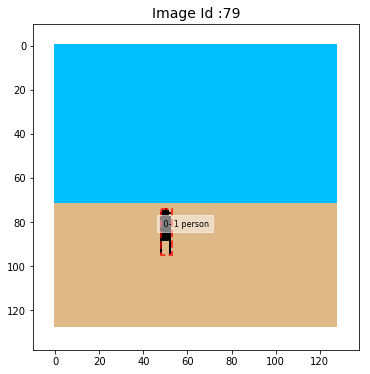

In [200]:
print(len(dataset_test.image_info[image_id]['shapes']) )
print(dataset_test.image_info[image_id]['shapes'])
if len(dataset_test.image_info[image_id]['shapes']) > 0:
    dataset_test.image_info[image_id]['shapes'] = []
    print('deleted')
dataset_test.image_info[image_id]['shapes'].append(new_obj)

vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
print(dataset_test.image_info[image_id]['shapes'])

## Initializations

In [280]:
def move_across_x_axis(IMAGE_ID, CLASS_ID, COLOR, TYPE = None, verbose = False, STEP_SIZE = 3):
    X_FROM  = 3
    X_TO    = 127

    axis_position = {}
    fcn_scores_1 = {}
    fcn_scores_2 = {}
    pr_scores = {}
    failed_predicts = 0 
    xy_movement = np.arange(X_FROM,X_TO,STEP_SIZE)
    

    CLASS_NAME = class_names[CLASS_ID]        
    HEIGHT = CY[TYPE][CLASS_NAME]
    if len(dataset_test.image_info[IMAGE_ID]['shapes']) > 0:
        dataset_test.image_info[IMAGE_ID]['shapes'] = []
#         print(' SHAPES IN IMAGE: ', IMAGE_ID , ' DELETED')
    
    new_obj = (CLASS_NAME, COLOR, (64, 64 , sizes[CLASS_NAME][0][0], sizes[CLASS_NAME][0][1]))
    dataset_test.image_info[IMAGE_ID]['shapes'].append(new_obj)
#     vis.display_image_gt(dataset_test, dataset_test.config, IMAGE_ID, size=6, verbose = False)          

    print(' Image Id   : ', IMAGE_ID, ' Class : ', CLASS_ID, ' - ', CLASS_NAME , ' Type: ' , TYPE, ' Height: ', HEIGHT)
    print(' Move from X: ', X_FROM, ' to: ', X_TO, ' step: ', STEP_SIZE)
    print(' Sizes      : ', sizes[CLASS_NAME])

    for i, (sx,sy) in enumerate(sizes[CLASS_NAME]):
        print(i, sx, sy)
        fcn_scores_1[i]  = []
        fcn_scores_2[i]  = []
        pr_scores[i]     = []
        axis_position[i] = []

        for cx in xy_movement:        
            new_obj = (CLASS_NAME, COLOR, (cx, HEIGHT , sx, sy))
            dataset_test.image_info[IMAGE_ID]['shapes'][0]= new_obj

            try:
                r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, IMAGE_ID, verbose = False)  
            except Exception as e :
                failed_predicts += 1
                print('    failure on mrcnn predict - image id: {} at cx:{} cy:{}    total failures: {}'.format(IMAGE_ID, cx, HEIGHT, failed_predicts))      
                continue

            if verbose & (cx % 30 == 0) :  
                vis.display_image_gt(dataset_test, dataset_test.config, IMAGE_ID, size=6, verbose = False)  
            found = False
            for idx, (pr_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'][::-1],r[0]['fcn_scores'][::-1])): 
                pr_CLASS_ID = int(pr_row[sc.CLASS_COLUMN])
                if pr_CLASS_ID == CLASS_ID :
                    found = True
                    axis_position[i].append(cx)        
                    fcn_scores_1[i].append(round(fcn_row[sc.SCORE_1_COLUMN],4))  
                    fcn_scores_2[i].append(round(fcn_row[sc.SCORE_2_COLUMN],4))  
                    pr_scores[i].append(round(pr_row[sc.SCORE_1_COLUMN],4))

            if not found:
                axis_position[i].append(cx)        
                fcn_scores_1[i].append(0.0)  
                fcn_scores_2[i].append(0.0)  
                pr_scores[i].append(0.0)
                
    return (axis_position,fcn_scores_1, fcn_scores_2, pr_scores)

In [400]:
person_color = (139.0, 69.0, 19.0)
black = (0,0,0)
yellow = (255.0, 215.0, 0.0)
red = (227.0, 95.0, 90.0)
black = (0.0, 0.0, 0.0)
white  = (255.0, 255.0,255.0)
green = (85.0, 107.0, 47.0)
gray = (192.0, 192.0, 192.0)
MIN = 'MIN'
MAX = 'MAX'
AVG = 'AVG'
X_FROM  = 3
X_TO    = 127
Y_FROM  = 3
Y_TO    = 127
STEP_SIZE = 3
NUM_CLASSES = 9


sizes = {}
sizes['person']   = [(2,10), (3,11), (4,12)]
sizes['car']      = [(13,6), (14,7), (16,8), (18,9), (20,10), (22,11),(24,12),(26,13)]
sizes['sun']      = [(4,4), (5,5), (6,6), (7,7), (8,8), (9,9),(10,10)]
sizes['building'] = [(10,15), (14,17), (18,19), (22,21), (26,23), (30,25)]
sizes['tree']     = [(3,9), (5,14), (8,19), (10,24), (12,29)]
sizes['cloud']    = [(10,3), (20,5), (30,9), (40,10), (50,12), (60,12)]
sizes['airplane'] = [(16,6), (18,7), (21,8), (24,9), (26,10)]
sizes['truck']    = [(21,7), (27,9), (33,10), (39,11), (45,11), (51,12),(56,14)]

## without consideration of the horizon position in image 72
# cy_min = {'person' : 45,
#        'car'     : 45, 
#        'sun'     : 6,
#        'building': 19,
#        'tree'    : 33, 
#        'cloud'   : 6,
#        'airplane': 20, 
#        'truck'   : 42}

## WITH consideration of the horizion line in image 72
CY = {}
CY[MIN] = {'person'  : 80,
           'car'     : 75, 
           'sun'     : 6,
           'building': 49,
           'tree'    : 33, 
           'cloud'   : 10,
           'airplane': 20, 
           'truck'   : 70}

CY[AVG] = {'person'  : 100,
           'car'     : 100, 
           'sun'     : 15,
           'building': 51,
           'tree'    : 80, 
           'cloud'   : 20,
           'airplane': 30, 
           'truck'   : 90}

CY[MAX] = {'person' : 120,
           'car'     : 120, 
           'sun'     : 25,
           'building': 82,
           'tree'    : 98, 
           'cloud'   : 30,
           'airplane': 40, 
           'truck'   : 110}

for (sx,sy) in sizes['sun']:
    print(sx, sy)
# for i in CY:

#     print(i, CY[i])

new_obj = {}
new_obj[1]  = ('person'  , black, (50, 86, 2, 10))
new_obj[2]  = ('car'     , black, (64, 64, 16, 8))       
new_obj[3]  = ('sun'     , yellow, (64, 64, 7, 7))
new_obj[32] = ('sun'     , black, (64, 64, 7, 7))
new_obj[4]  = ('building', black, (64, 64, 19, 15))
new_obj[5]  = ('tree'    , green, (19, 84, 9, 21))
new_obj[6]  = ('cloud'   , gray, (64, 64, 35, 7))
new_obj[7]  = ('airplane', black, (64, 64, 22, 9))
new_obj[8]  = ('truck'   , black, (46, 101, 33, 11))

4 4
5 5
6 6
7 7
8 8
9 9
10 10


In [118]:
# axis_pos   = {} 
# fcn_scores_1  = {} 
# fcn_scores_2  = {}
# pr_scores     = {}

# for i in [MIN, MAX, AVG]:
#     axis_pos[i]     = {}
#     fcn_scores_1[i] = {}
#     fcn_scores_2[i] = {}
#     pr_scores[i]    = {}

##  Person

[('person', (0.0, 0.0, 0.0), (123, 100, 4, 12))]
deleted
[('person', (0.0, 0.0, 0.0), (50, 86, 2, 10))]
80 100 120


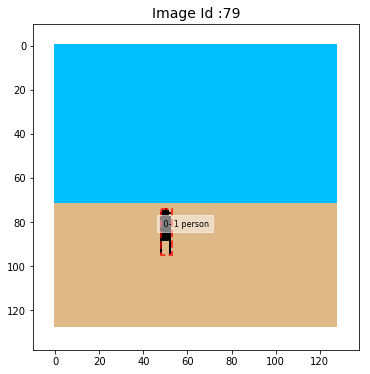

In [401]:
CLASS_ID = 1
cls_name = class_names[CLASS_ID]
print(dataset_test.image_info[image_id]['shapes'])
if len(dataset_test.image_info[image_id]['shapes']) > 0:
    dataset_test.image_info[image_id]['shapes'] = []
    print('deleted')
dataset_test.image_info[image_id]['shapes'].append(new_obj[CLASS_ID])
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
print(dataset_test.image_info[image_id]['shapes'])
print(CY[MIN][cls_name],CY[AVG][cls_name],CY[MAX][cls_name])

In [402]:
cls = 1
color = black
for i in [MIN, MAX, AVG]:
    axis_pos[i][CLASS_ID]= {}
    fcn_scores_1[i][CLASS_ID] = {}
    fcn_scores_2[i][CLASS_ID] = {}
    pr_scores[i][CLASS_ID]    = {}
    axis_pos[i][CLASS_ID] , fcn_scores_1[i][CLASS_ID], fcn_scores_2[i][CLASS_ID], pr_scores[CLASS_ID] = move_across_x_axis(image_id, CLASS_ID, color, i, STEP_SIZE=5)

 Image Id   :  79  Class :  1  -  person  Type:  MIN  Height:  80
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(2, 10), (3, 11), (4, 12)]
0 2 10
1 3 11
2 4 12
 Image Id   :  79  Class :  1  -  person  Type:  MAX  Height:  120
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(2, 10), (3, 11), (4, 12)]
0 2 10
1 3 11
2 4 12
 Image Id   :  79  Class :  1  -  person  Type:  AVG  Height:  100
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(2, 10), (3, 11), (4, 12)]
0 2 10
1 3 11
2 4 12


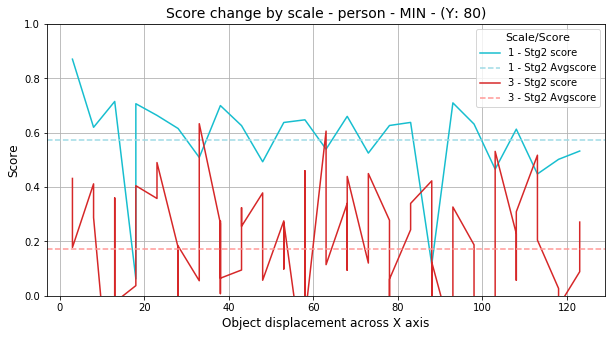

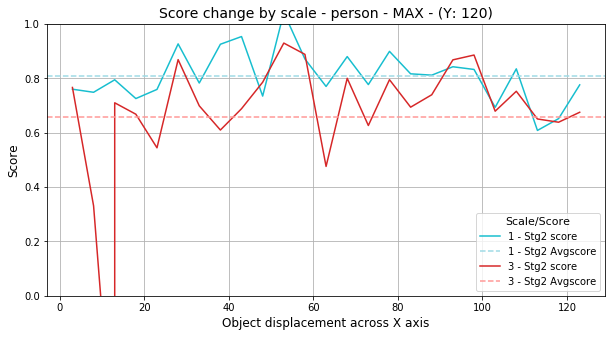

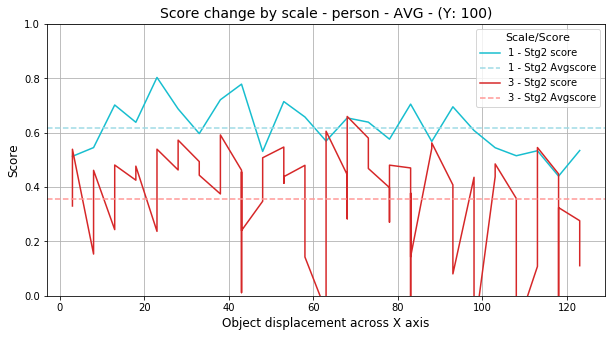

In [403]:
CLASS_ID = 1
cls_name = class_names[CLASS_ID]
scales = [0, 2]
plot  = None
for i in [MIN, MAX, AVG]:
    ttl = i + ' - (Y: '+ str(CY[i][cls_name])+')'
    vis2.plot_exp6_score_curves(axis_pos[i][CLASS_ID], fcn_scores_1[i][CLASS_ID] , pr_scores[i][CLASS_ID], cls_name, ttl = ttl , scales = scales, plot= plot)

[0, 2]
 y limit: (-0.024575, 0.516075)  xlimit :  (-3.0, 129.0)
[0, 2]
 y limit: (-0.227435, 1.1285349999999998)  xlimit :  (-3.1500000000000004, 132.15)
[0, 2]
 y limit: (-0.42076499999999994, 0.9138649999999999)  xlimit :  (-3.1500000000000004, 132.15)


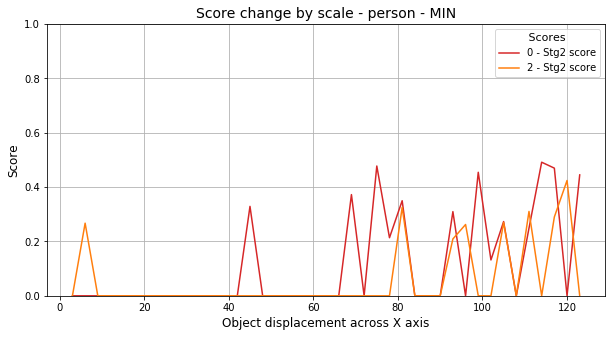

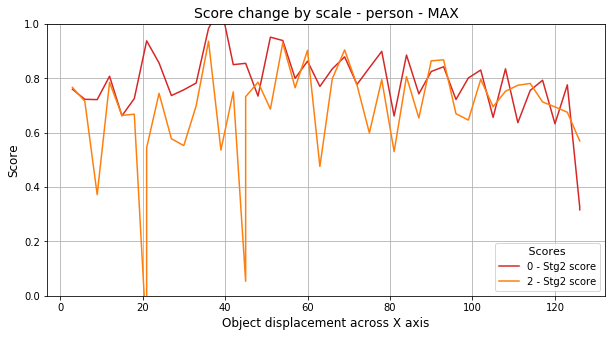

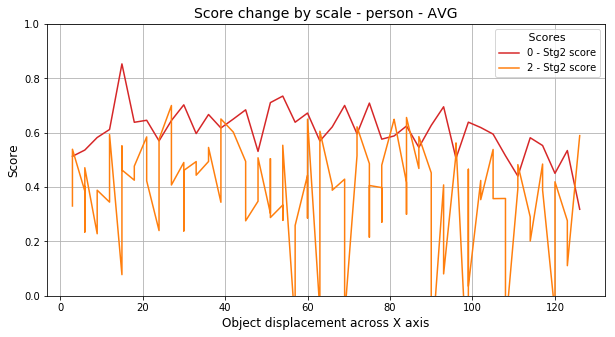

In [126]:
scales = [0, 2]
plot  = None
cls = 1
for i in [MIN, MAX, AVG]:
    vis2.plot_exp6_score_curves(axis_pos[i][cls], fcn_scores_1[i][cls] , pr_scores[i][cls], class_names[cls], ttl = i , scales = scales, plot= plot)

##  Car

[('tree', (0.0, 0.0, 0.0), (126, 80, 12, 29))]
deleted
[('car', (0.0, 0.0, 0.0), (64, 64, 16, 8))]
75 100 120


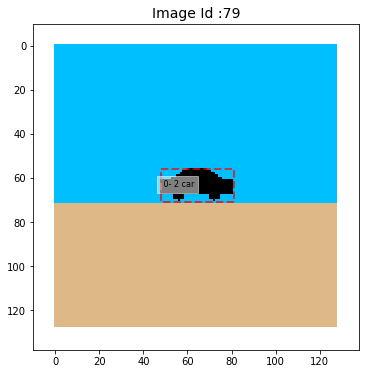

In [250]:
CLASS_ID = 2
cls_name = class_names[CLASS_ID]
print(dataset_test.image_info[image_id]['shapes'])
if len(dataset_test.image_info[image_id]['shapes']) > 0:
    dataset_test.image_info[image_id]['shapes'] = []
    print('deleted')
dataset_test.image_info[image_id]['shapes'].append(new_obj[CLASS_ID])
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
print(dataset_test.image_info[image_id]['shapes'])
print(CY[MIN][cls_name],CY[AVG][cls_name],CY[MAX][cls_name])

 height  75
 Image Id   :  79  Class :  2  -  car  Type:  MIN  Height:  75
 Move from X:  3  to:  127  step:  3
 Sizes      :  [(13, 6), (14, 7), (16, 8), (18, 9), (20, 10), (22, 11), (24, 12), (26, 13)]
0 13 6
1 14 7
2 16 8
3 18 9
4 20 10
5 22 11


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


6 24 12
7 26 13
 height  120
 Image Id   :  79  Class :  2  -  car  Type:  MAX  Height:  120
 Move from X:  3  to:  127  step:  3
 Sizes      :  [(13, 6), (14, 7), (16, 8), (18, 9), (20, 10), (22, 11), (24, 12), (26, 13)]
0 13 6
1 14 7
2 16 8
3 18 9
4 20 10
5 22 11
6 24 12
7 26 13
 height  100
 Image Id   :  79  Class :  2  -  car  Type:  AVG  Height:  100
 Move from X:  3  to:  127  step:  3
 Sizes      :  [(13, 6), (14, 7), (16, 8), (18, 9), (20, 10), (22, 11), (24, 12), (26, 13)]
0 13 6
1 14 7
2 16 8
3 18 9
4 20 10
5 22 11
6 24 12
7 26 13


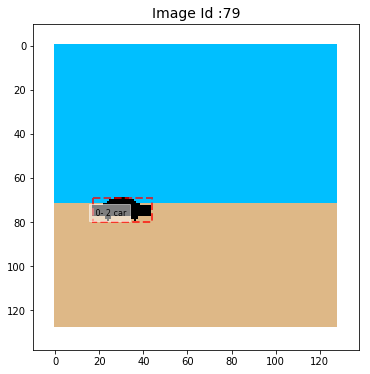

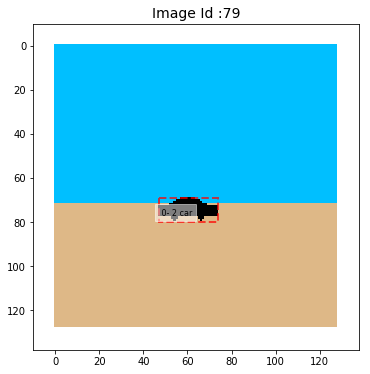

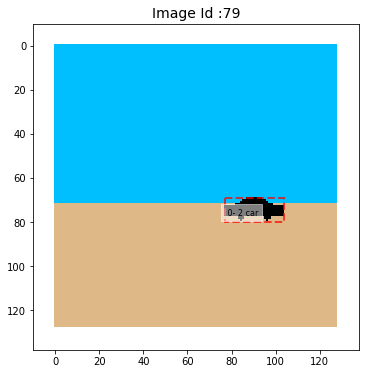

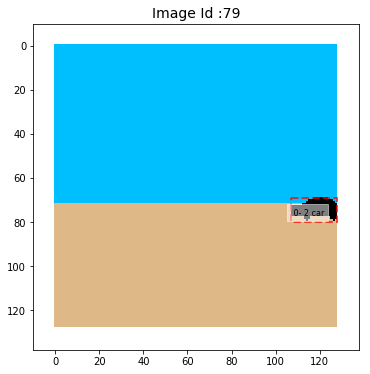

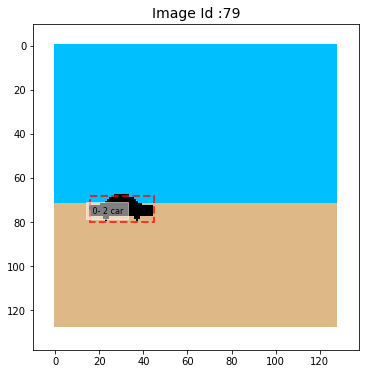

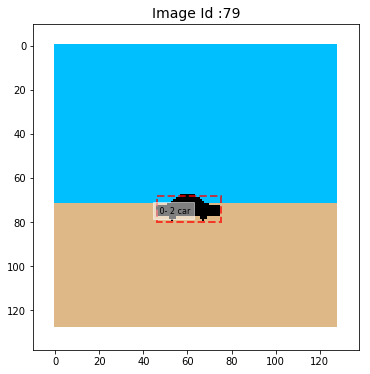

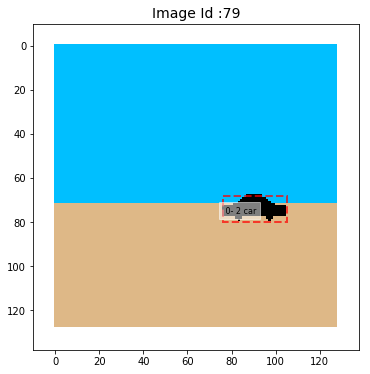

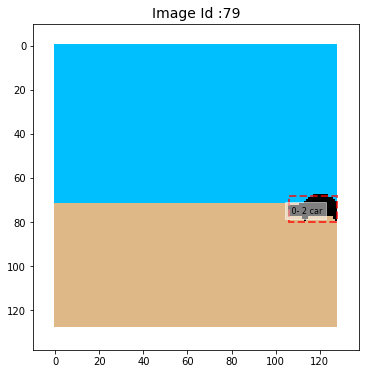

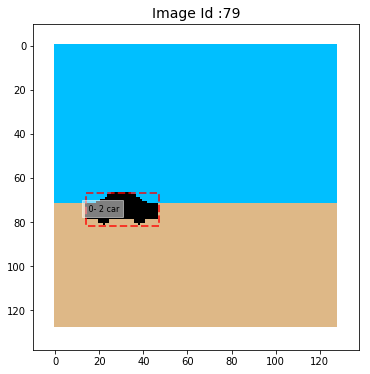

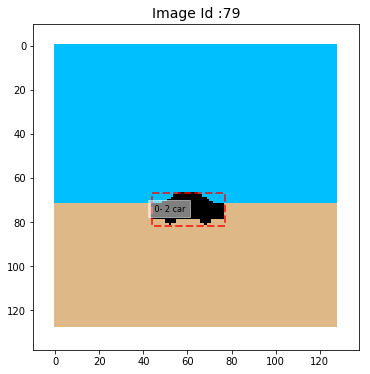

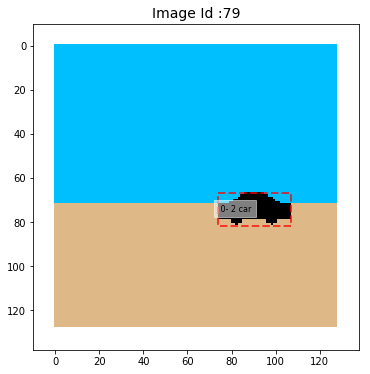

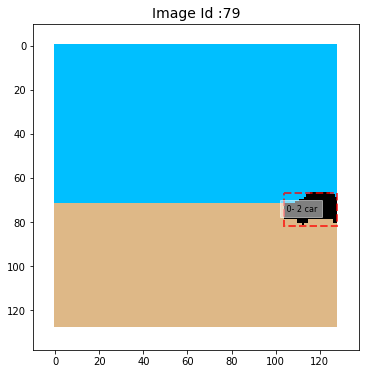

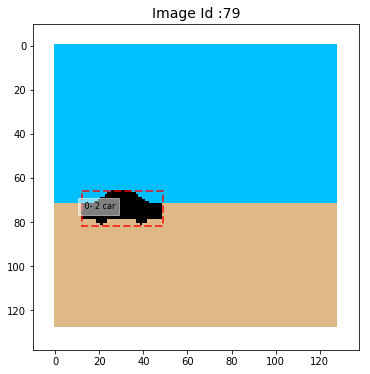

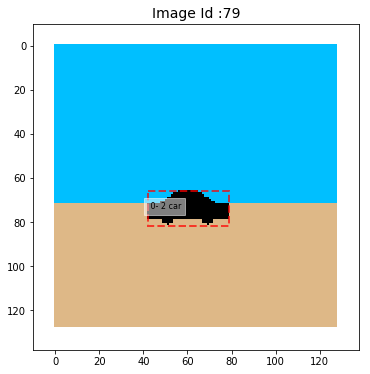

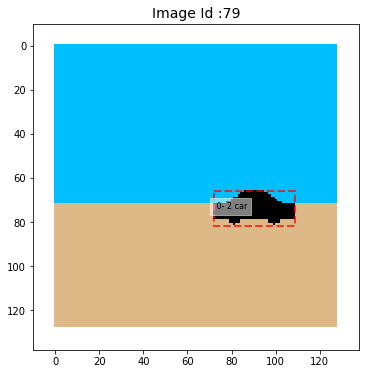

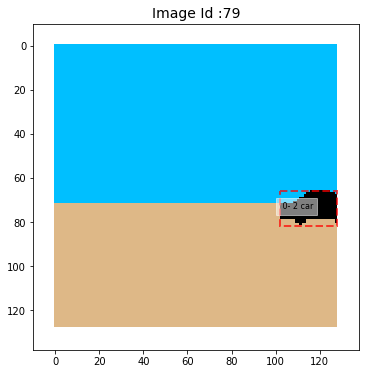

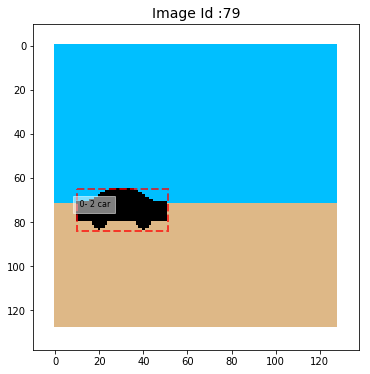

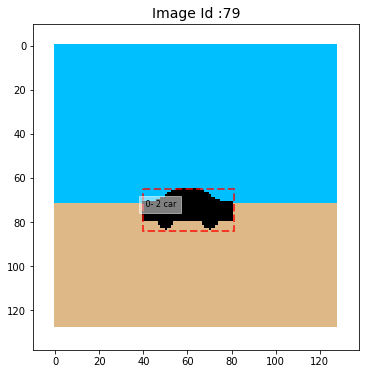

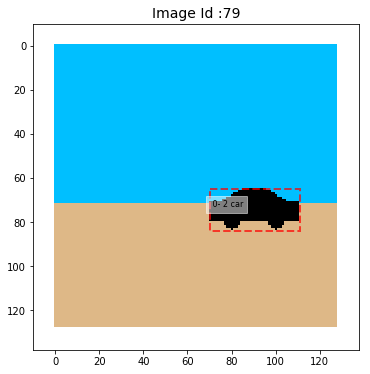

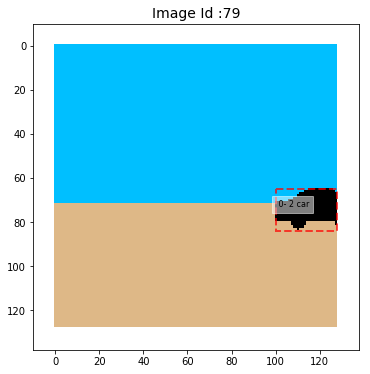

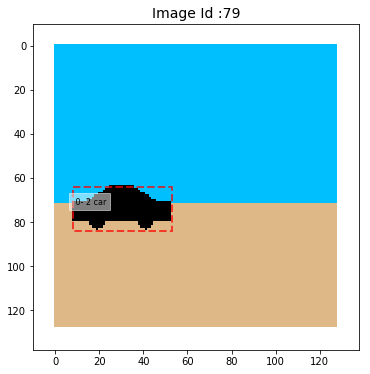

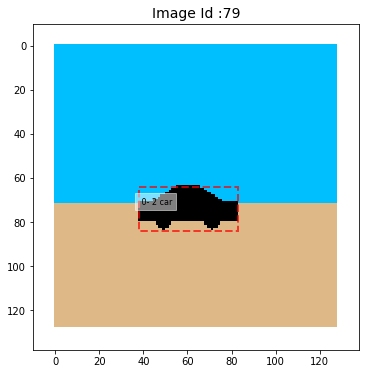

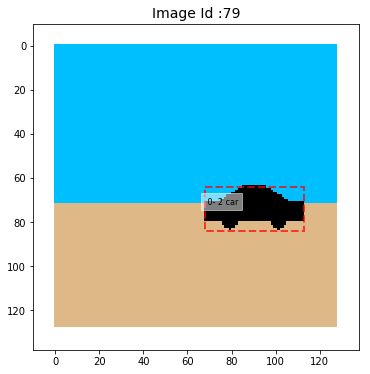

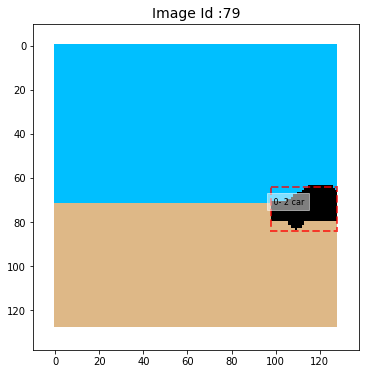

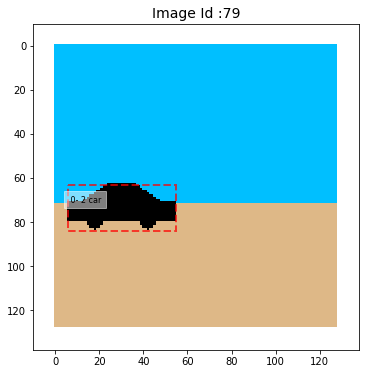

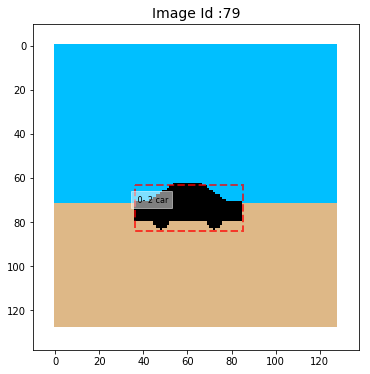

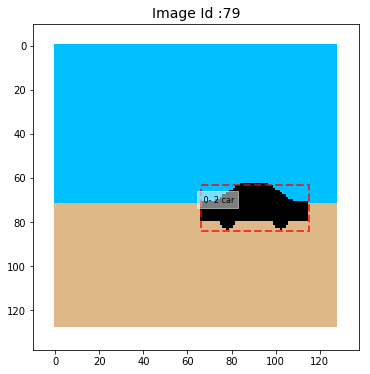

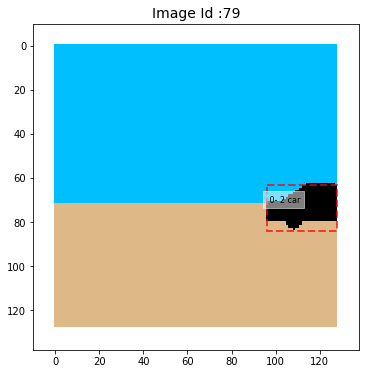

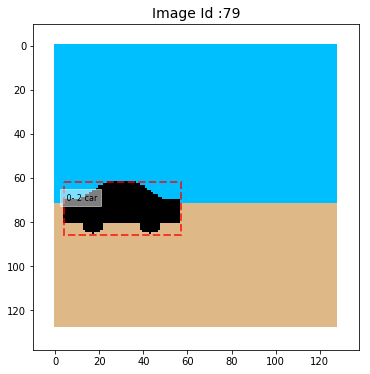

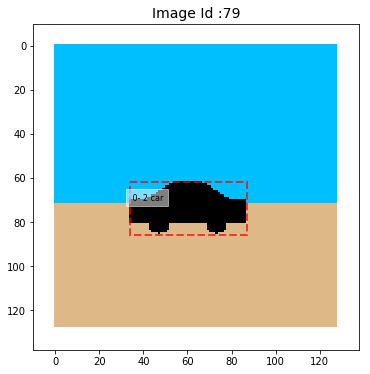

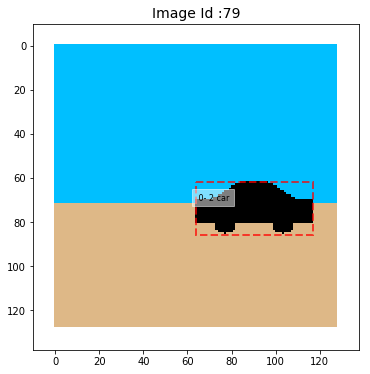

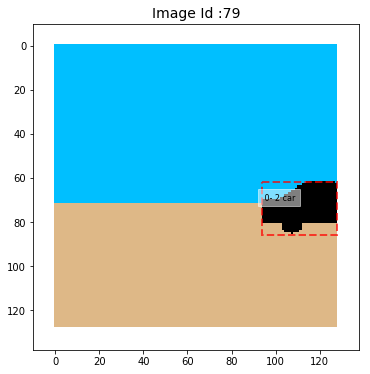

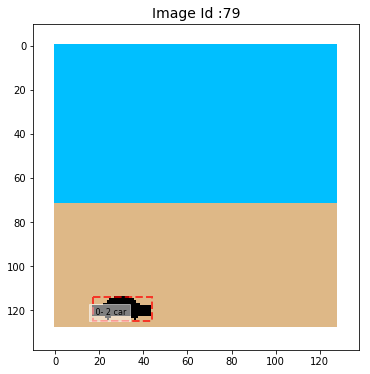

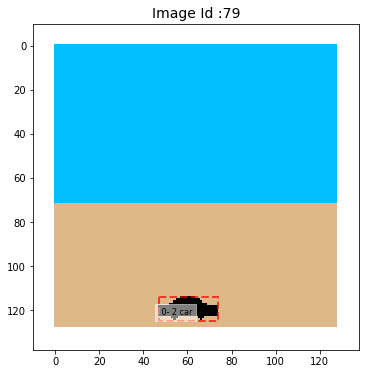

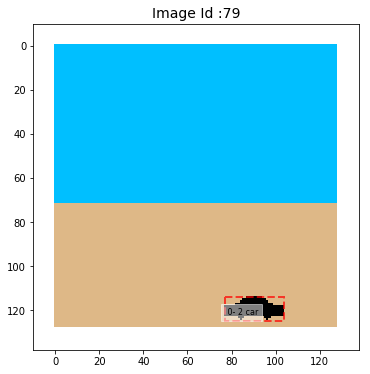

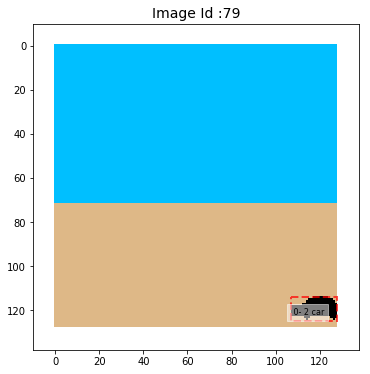

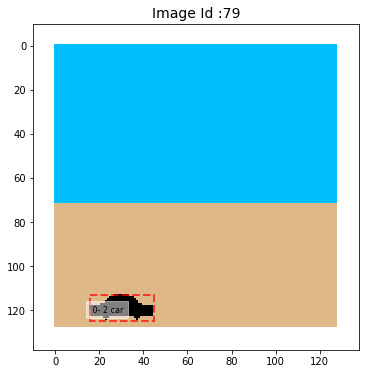

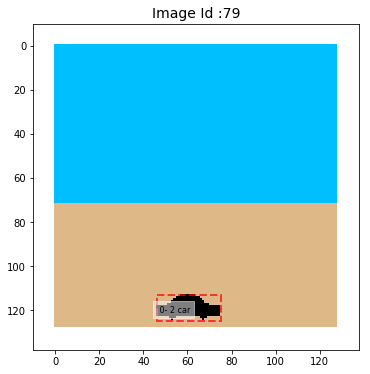

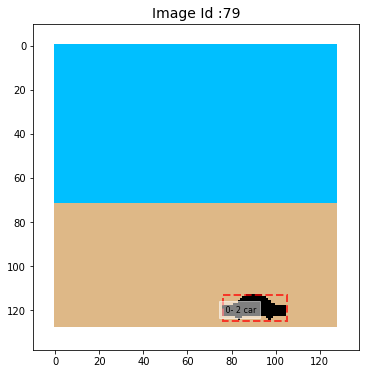

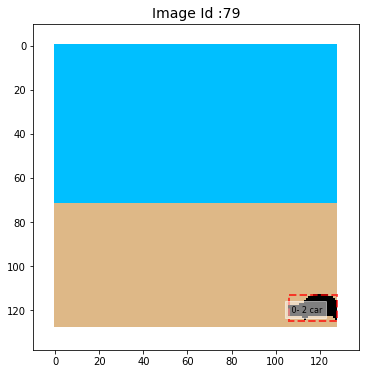

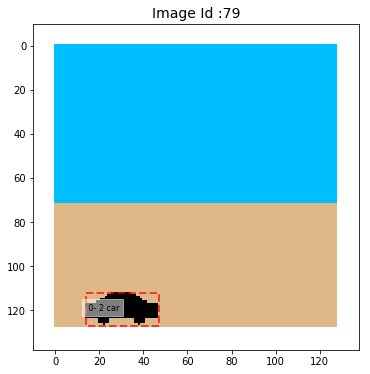

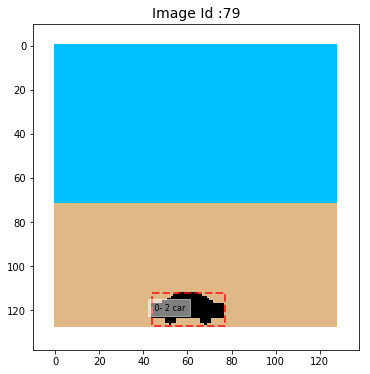

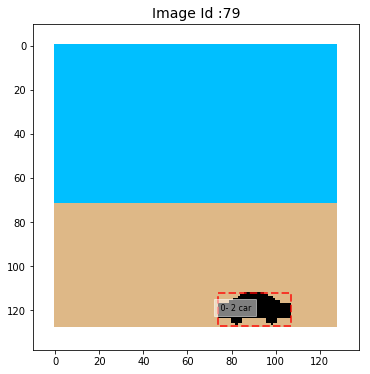

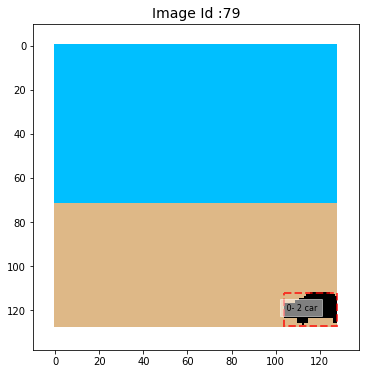

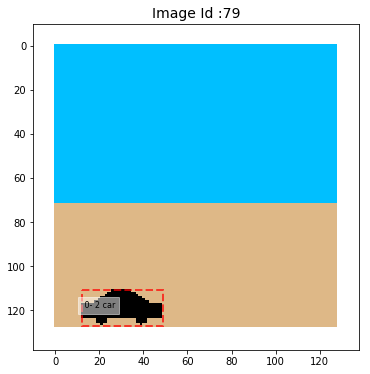

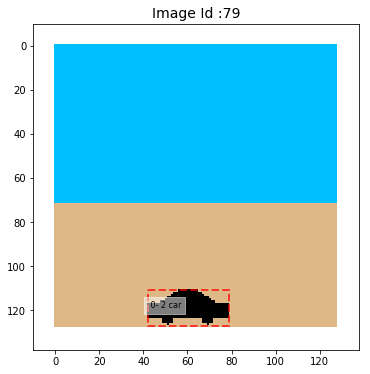

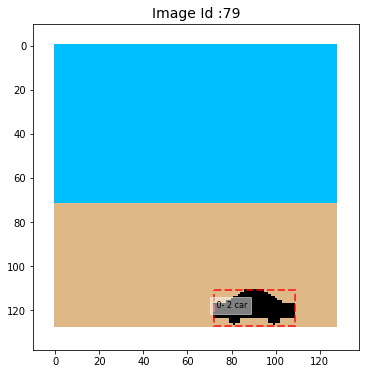

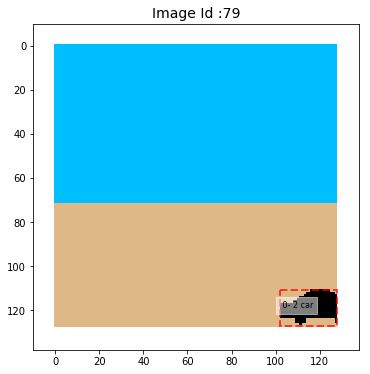

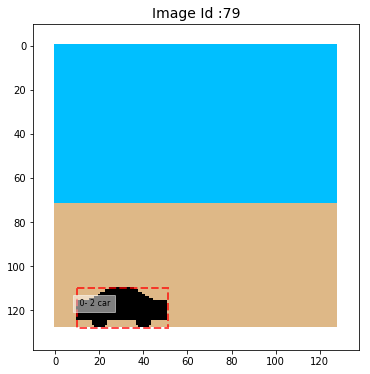

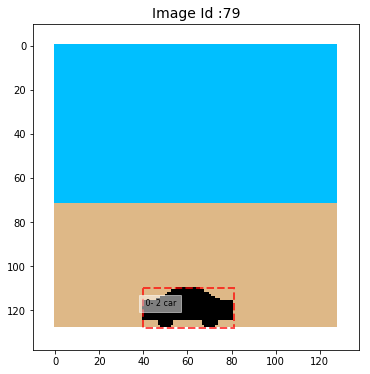

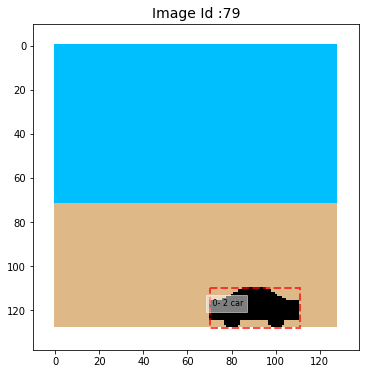

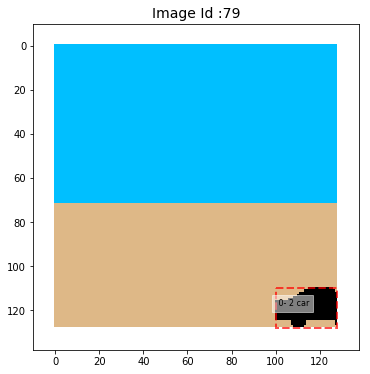

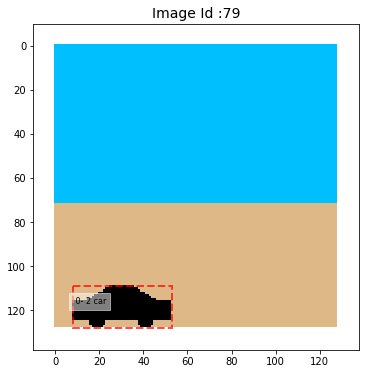

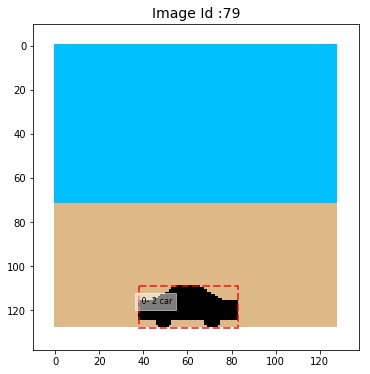

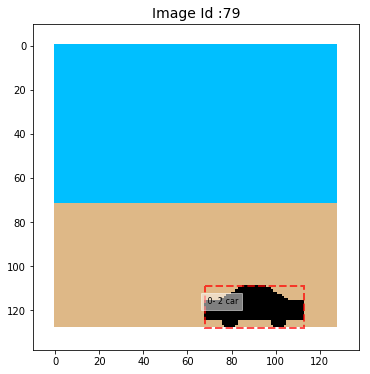

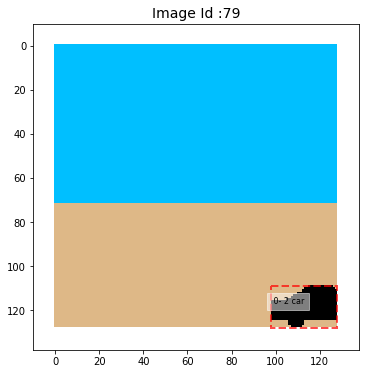

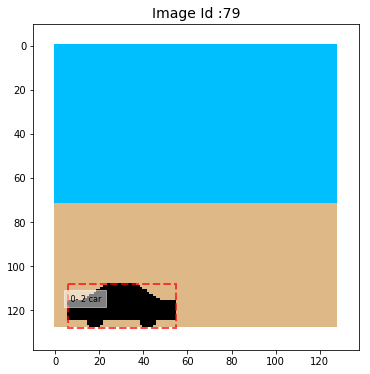

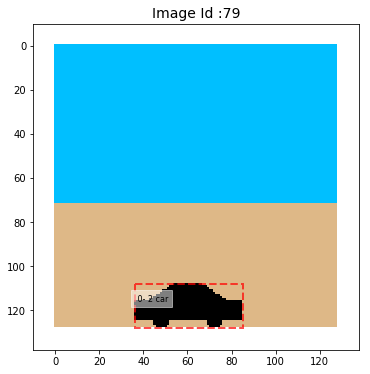

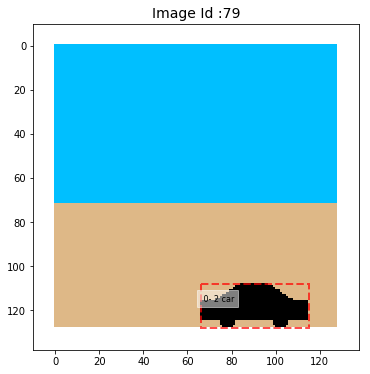

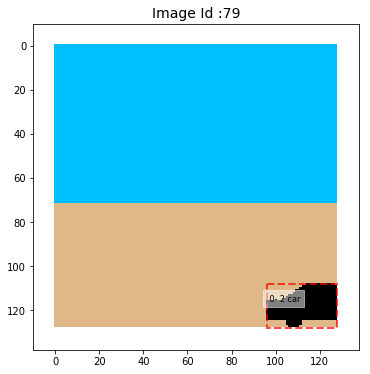

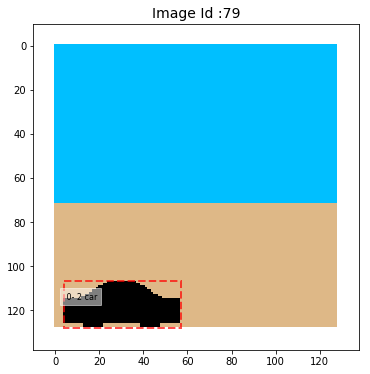

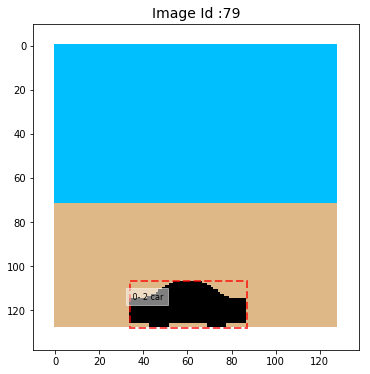

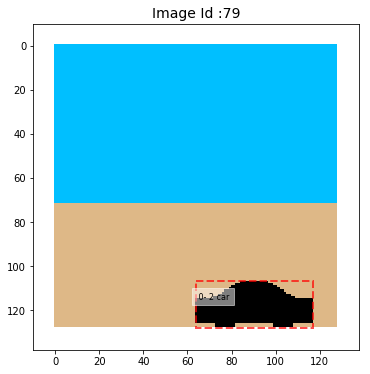

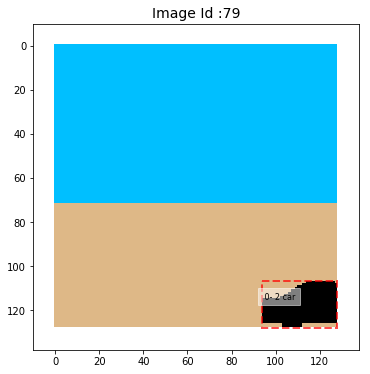

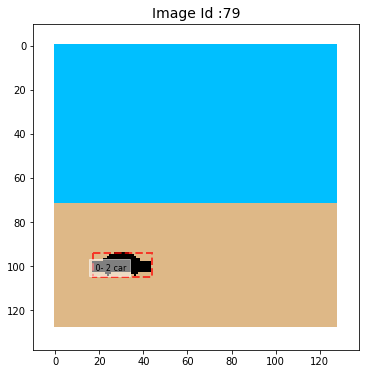

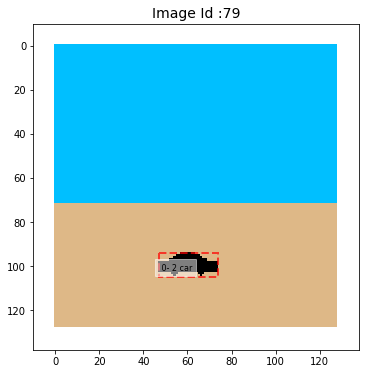

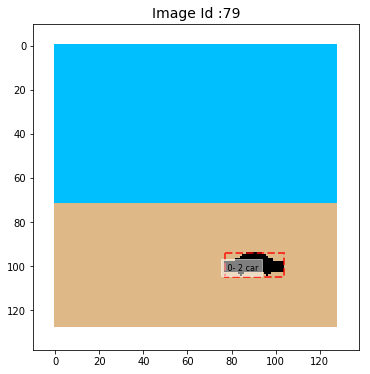

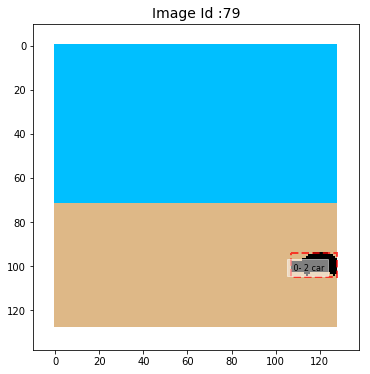

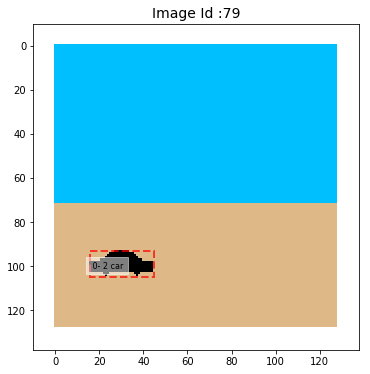

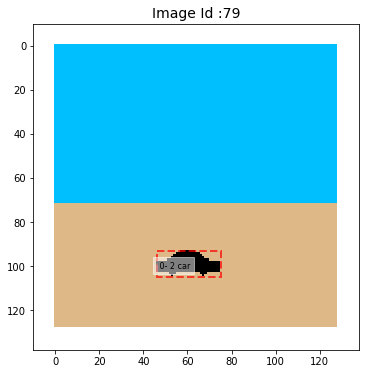

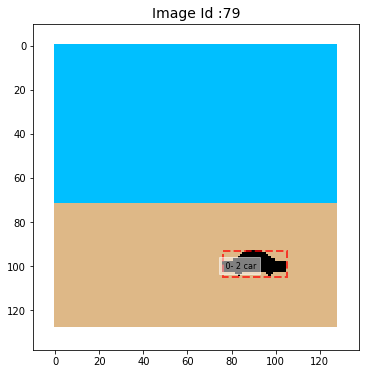

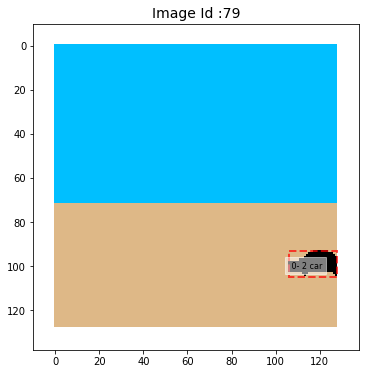

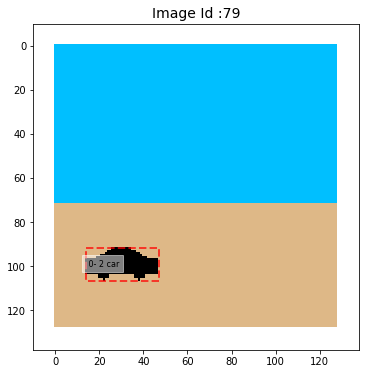

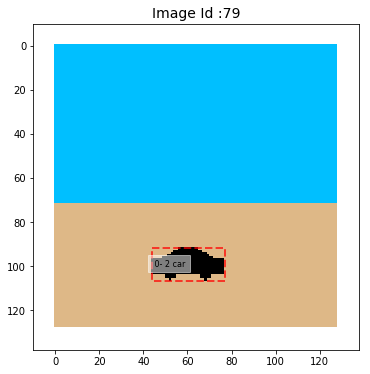

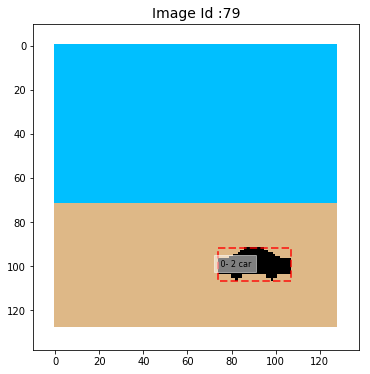

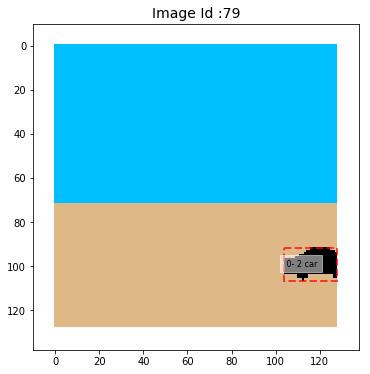

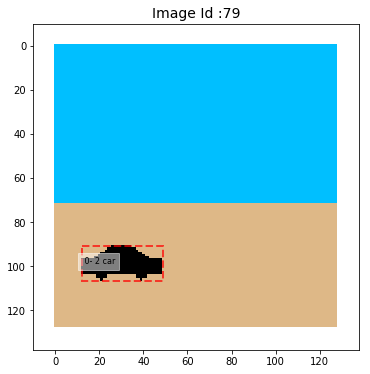

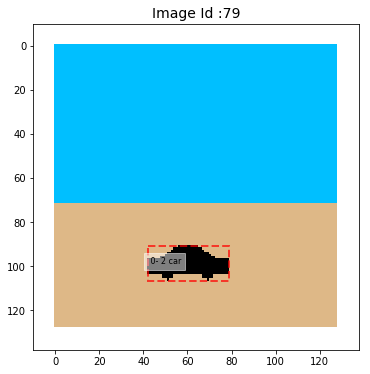

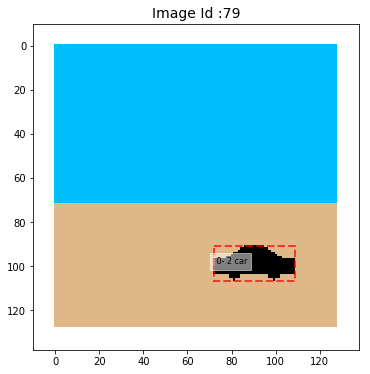

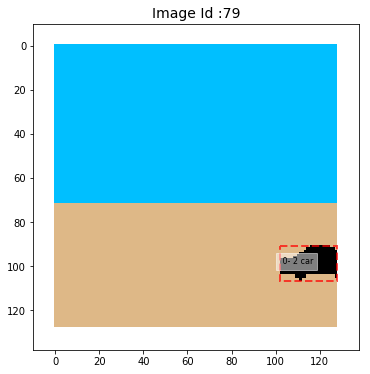

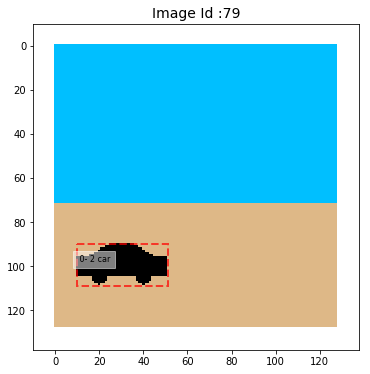

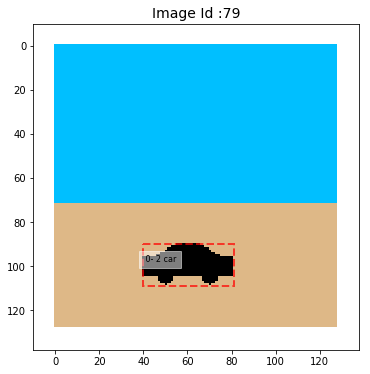

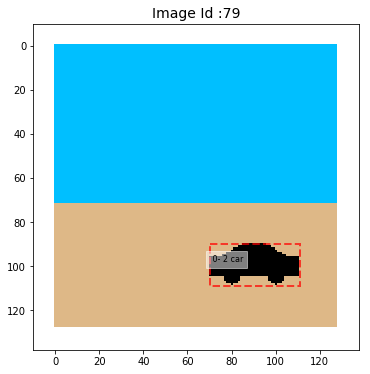

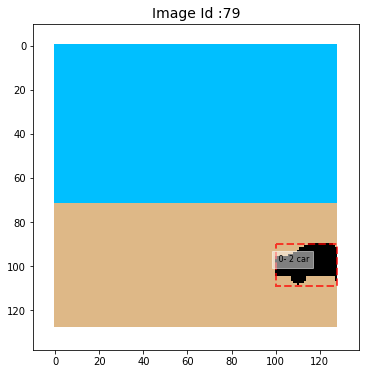

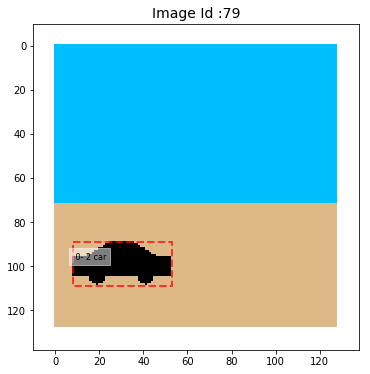

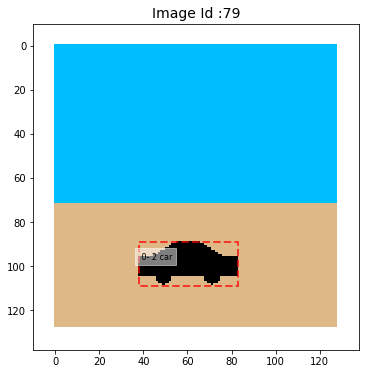

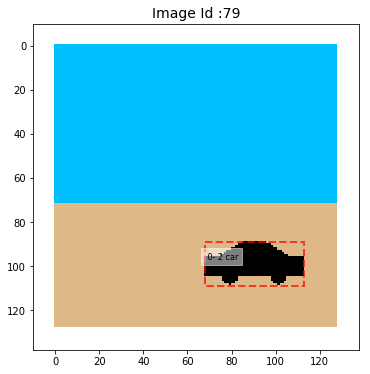

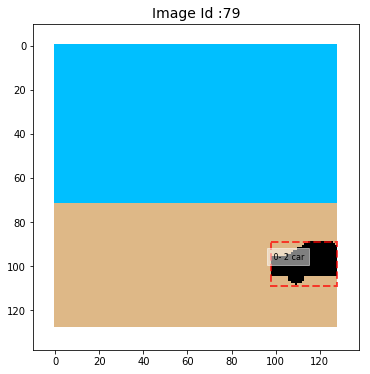

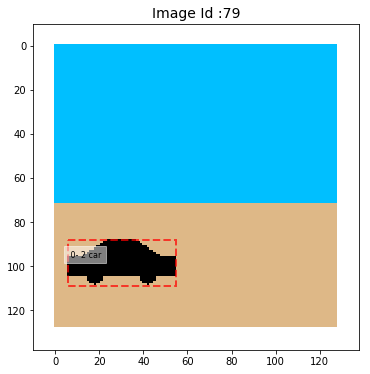

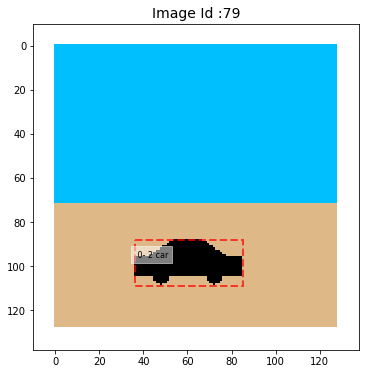

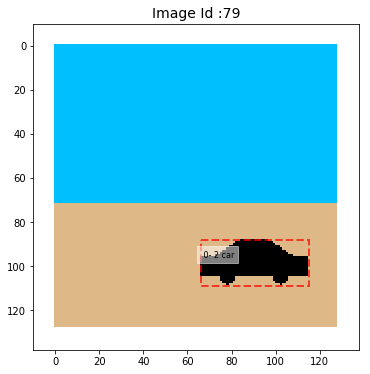

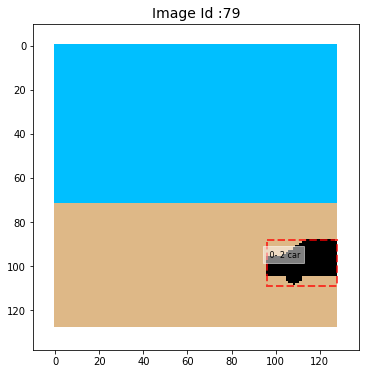

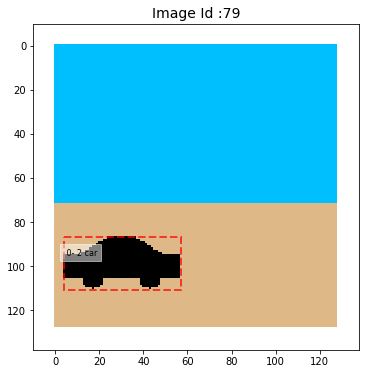

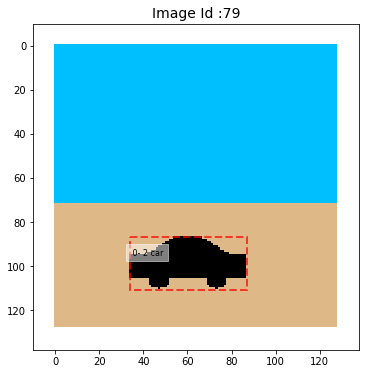

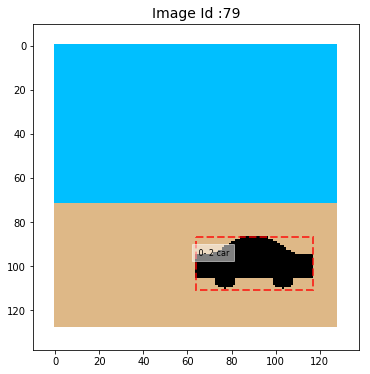

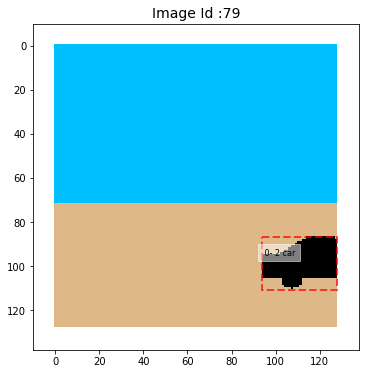

In [251]:
cls = 2
color = black
for i in [MIN, MAX, AVG]:
    axis_pos[i][CLASS_ID]= {}
    fcn_scores_1[i][CLASS_ID] = {}
    fcn_scores_2[i][CLASS_ID] = {}
    pr_scores[i][CLASS_ID]    = {}
    axis_pos[i][CLASS_ID] , fcn_scores_1[i][CLASS_ID], fcn_scores_2[i][CLASS_ID], pr_scores[CLASS_ID] = move_across_x_axis(image_id, CLASS_ID, color, i, STEP_SIZE=5)

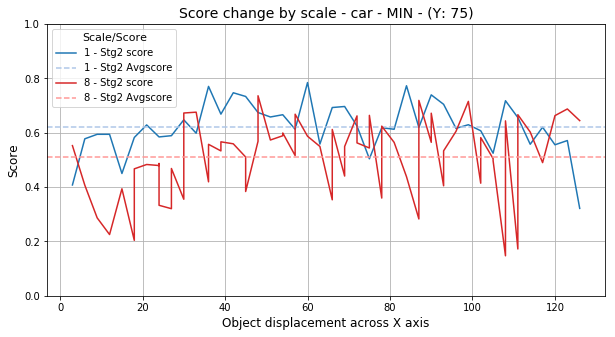

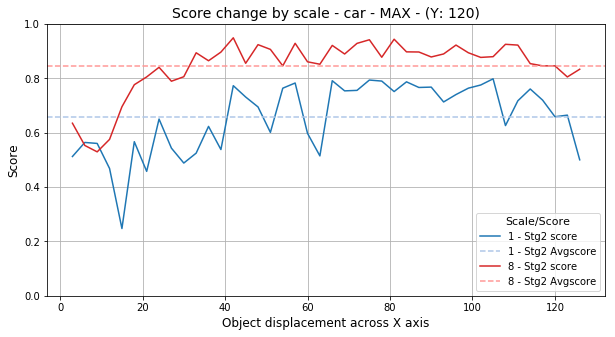

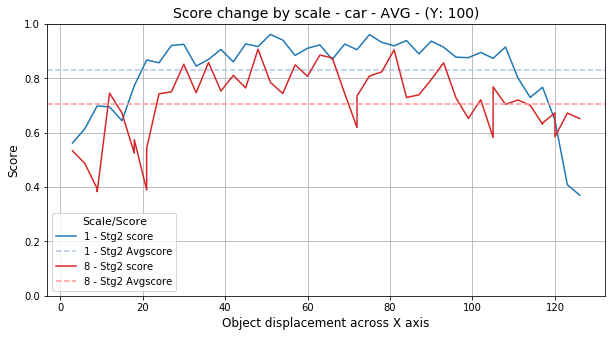

In [419]:
CLASS_ID = 2
cls_name = class_names[CLASS_ID]
scales = [0, 7]
plot  = None
for i in [MIN, MAX, AVG]:
    ttl = i + ' - (Y: '+ str(CY[i][cls_name])+')'
    vis2.plot_exp6_score_curves(axis_pos[i][CLASS_ID], fcn_scores_1[i][CLASS_ID] , pr_scores[i][CLASS_ID], cls_name, ttl = ttl , scales = scales, plot= plot)

##  Sun  - Yellow

[('sun', (0.0, 0.0, 0.0), (123, 15, 10, 10))]
deleted
[('sun', (255.0, 215.0, 0.0), (64, 64, 7, 7))]
6 15 25


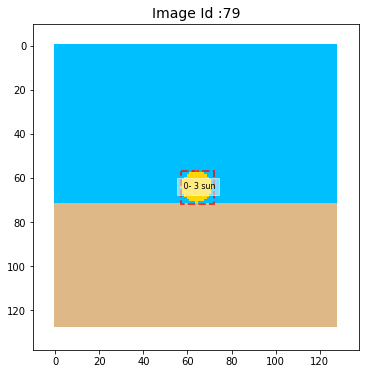

In [337]:
CLASS_ID = 3
cls_name = class_names[CLASS_ID]
print(dataset_test.image_info[image_id]['shapes'])
if len(dataset_test.image_info[image_id]['shapes']) > 0:
    dataset_test.image_info[image_id]['shapes'] = []
    print('deleted')
dataset_test.image_info[image_id]['shapes'].append(new_obj[CLASS_ID])
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
print(dataset_test.image_info[image_id]['shapes'])
print(CY[MIN][cls_name],CY[AVG][cls_name],CY[MAX][cls_name])

In [338]:
CLASS_ID = 3
color = yellow
for i in [MIN, MAX, AVG]:
    axis_pos[i][CLASS_ID]= {}
    fcn_scores_1[i][CLASS_ID] = {}
    fcn_scores_2[i][CLASS_ID] = {}
    pr_scores[i][CLASS_ID]    = {}
    axis_pos[i][CLASS_ID] , fcn_scores_1[i][CLASS_ID], fcn_scores_2[i][CLASS_ID], pr_scores[CLASS_ID] = move_across_x_axis(image_id, CLASS_ID, color, i, STEP_SIZE=5)

 Image Id   :  79  Class :  3  -  sun  Type:  MIN  Height:  6
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10)]
0 4 4
1 5 5
2 6 6
3 7 7
4 8 8
5 9 9
6 10 10
 Image Id   :  79  Class :  3  -  sun  Type:  MAX  Height:  25
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10)]
0 4 4
1 5 5
2 6 6
3 7 7
4 8 8
5 9 9
6 10 10
 Image Id   :  79  Class :  3  -  sun  Type:  AVG  Height:  15
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10)]
0 4 4
1 5 5
2 6 6
3 7 7
4 8 8
5 9 9
6 10 10


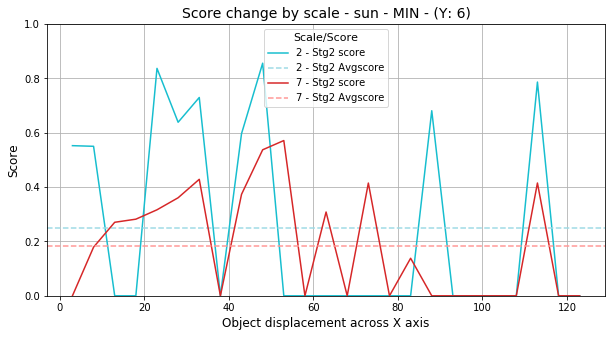

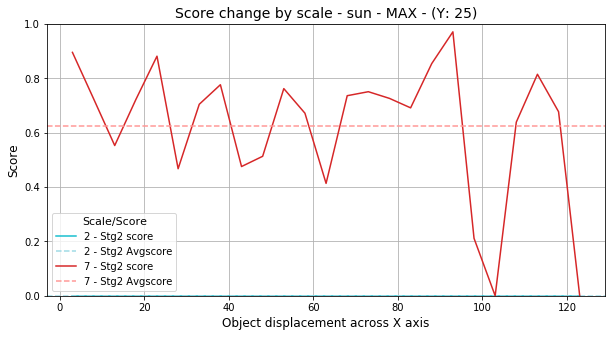

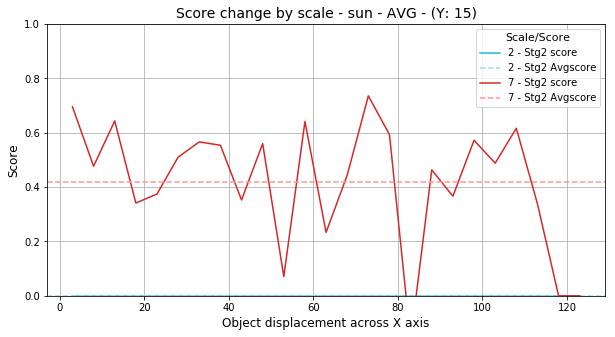

In [394]:
CLASS_ID = 3
cls_name = class_names[CLASS_ID]
scales = [1,6]
# scales = None
plot  = None
for i in [MIN, MAX, AVG]:
    cls_name = class_names[CLASS_ID]
    ttl = i + ' - (Y: '+ str(CY[i][cls_name])+')'
    vis2.plot_exp6_score_curves(axis_pos[i][CLASS_ID], fcn_scores_1[i][CLASS_ID] , pr_scores[i][CLASS_ID], cls_name, ttl = ttl , scales = scales)

In [347]:
print(np.array(fcn_scores_1[MAX][3][0]).shape)
print(np.mean(fcn_scores_1[MAX][3][0], keepdims = True))


(26,)
[0.8873]


##  Sun  - Black

[('sun', (192.0, 192.0, 192.0), (123, 15, 10, 10))]
deleted
[('sun', (255.0, 215.0, 0.0), (64, 64, 7, 7))]
6 15 25


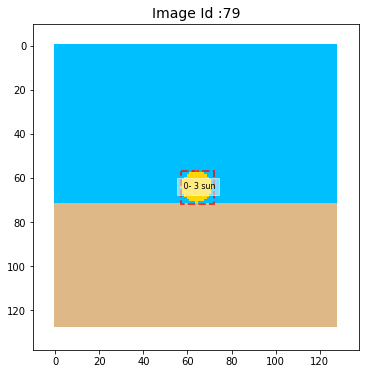

In [332]:
CLASS_ID = 3
cls_name = class_names[CLASS_ID]
print(dataset_test.image_info[image_id]['shapes'])
if len(dataset_test.image_info[image_id]['shapes']) > 0:
    dataset_test.image_info[image_id]['shapes'] = []
    print('deleted')
dataset_test.image_info[image_id]['shapes'].append(new_obj[CLASS_ID])
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
print(dataset_test.image_info[image_id]['shapes'])
print(CY[MIN][cls_name],CY[AVG][cls_name],CY[MAX][cls_name])

In [409]:
CLASS_ID = 3
color = black
for i in [MIN, MAX, AVG]:
    axis_pos[i][CLASS_ID]= {}
    fcn_scores_1[i][CLASS_ID] = {}
    fcn_scores_2[i][CLASS_ID] = {}
    pr_scores[i][CLASS_ID]    = {}
    axis_pos[i][CLASS_ID] , fcn_scores_1[i][CLASS_ID], fcn_scores_2[i][CLASS_ID], pr_scores[CLASS_ID] = move_across_x_axis(image_id, CLASS_ID, color, i, STEP_SIZE=5)

 Image Id   :  79  Class :  3  -  sun  Type:  MIN  Height:  6
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10)]
0 4 4
1 5 5
2 6 6
3 7 7
4 8 8
    failure on mrcnn predict - image id: 79 at cx:123 cy:6    total failures: 1
5 9 9
6 10 10
 Image Id   :  79  Class :  3  -  sun  Type:  MAX  Height:  25
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10)]
0 4 4
1 5 5
2 6 6
3 7 7
4 8 8
5 9 9
6 10 10
 Image Id   :  79  Class :  3  -  sun  Type:  AVG  Height:  15
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10)]
0 4 4
1 5 5
2 6 6
3 7 7
4 8 8
5 9 9
6 10 10


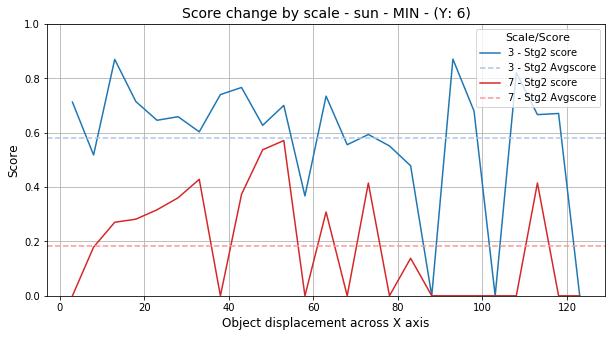

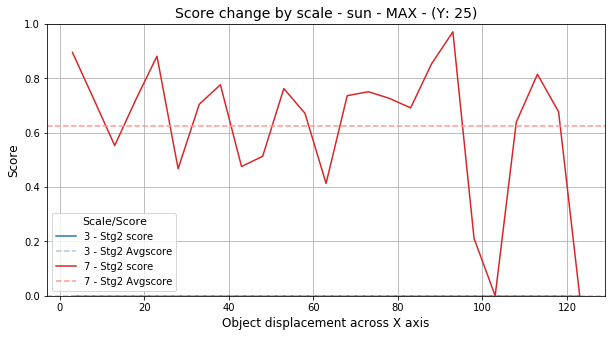

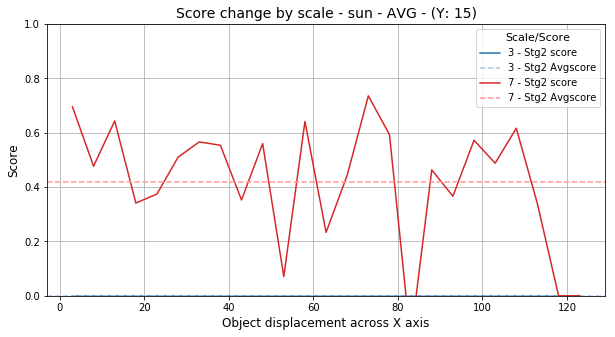

In [416]:
CLASS_ID = 3
cls_name = class_names[CLASS_ID]
scales = [2,6]
# scales = None
plot  = None
for i in [MIN, MAX, AVG]:
    cls_name = class_names[CLASS_ID]
    ttl = i + ' - (Y: '+ str(CY[i][cls_name])+')'
    vis2.plot_exp6_score_curves(axis_pos[i][CLASS_ID], fcn_scores_1[i][CLASS_ID] , pr_scores[i][CLASS_ID], cls_name, ttl = ttl , scales = scales)

##  Building

[('building', (0.0, 0.0, 0.0), (64, 64, 19, 15))]
deleted
[('building', (0.0, 0.0, 0.0), (64, 64, 19, 15))]
49 51 82


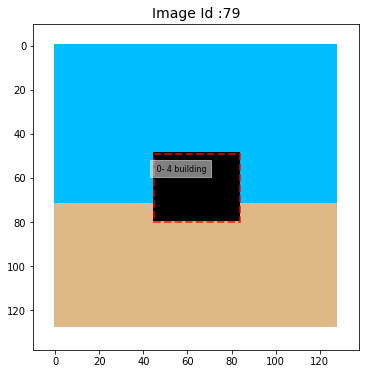

In [362]:
CLASS_ID = 4
cls_name = class_names[CLASS_ID]
print(dataset_test.image_info[image_id]['shapes'])
if len(dataset_test.image_info[image_id]['shapes']) > 0:
    dataset_test.image_info[image_id]['shapes'] = []
    print('deleted')
dataset_test.image_info[image_id]['shapes'].append(new_obj[CLASS_ID])
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
print(dataset_test.image_info[image_id]['shapes'])
print(CY[MIN][cls_name],CY[AVG][cls_name],CY[MAX][cls_name])

In [363]:
CLASS_ID = 4
color = black
for i in [MIN, MAX, AVG]:
    axis_pos[i][CLASS_ID]= {}
    fcn_scores_1[i][CLASS_ID] = {}
    fcn_scores_2[i][CLASS_ID] = {}
    pr_scores[i][CLASS_ID]    = {}
    axis_pos[i][CLASS_ID] , fcn_scores_1[i][CLASS_ID], fcn_scores_2[i][CLASS_ID], pr_scores[CLASS_ID] = move_across_x_axis(image_id, CLASS_ID, black, i, STEP_SIZE = 5)

 Image Id   :  79  Class :  4  -  building  Type:  MIN  Height:  49
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(10, 15), (14, 17), (18, 19), (22, 21), (26, 23), (30, 25)]
0 10 15
1 14 17
2 18 19
3 22 21
4 26 23
5 30 25
 Image Id   :  79  Class :  4  -  building  Type:  MAX  Height:  82
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(10, 15), (14, 17), (18, 19), (22, 21), (26, 23), (30, 25)]
0 10 15
1 14 17
2 18 19
3 22 21
4 26 23
5 30 25
 Image Id   :  79  Class :  4  -  building  Type:  AVG  Height:  51
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(10, 15), (14, 17), (18, 19), (22, 21), (26, 23), (30, 25)]
0 10 15
1 14 17
2 18 19
3 22 21
4 26 23
5 30 25


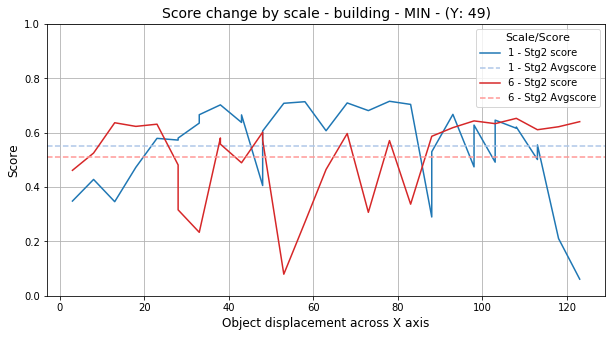

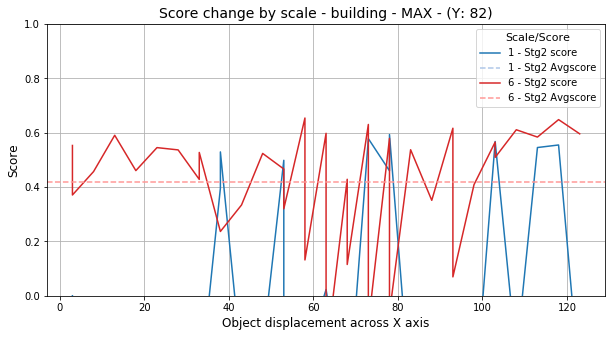

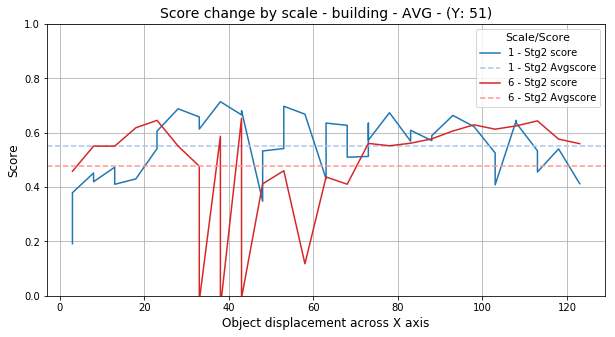

In [413]:
CLASS_ID = 4
cls_name = class_names[CLASS_ID]
scales = [0, 5]
plot  = None
for i in [MIN, MAX, AVG]:
    cls_name = class_names[CLASS_ID]
    ttl = i + ' - (Y: '+ str(CY[i][cls_name])+')'
    vis2.plot_exp6_score_curves(axis_pos[i][CLASS_ID], fcn_scores_1[i][CLASS_ID] , pr_scores[i][CLASS_ID], cls_name, ttl = ttl , scales = scales)

##  Tree - Black

[('building', (0.0, 0.0, 0.0), (123, 51, 30, 25))]
deleted
[('tree', (85.0, 107.0, 47.0), (19, 84, 9, 21))]
33 80 98


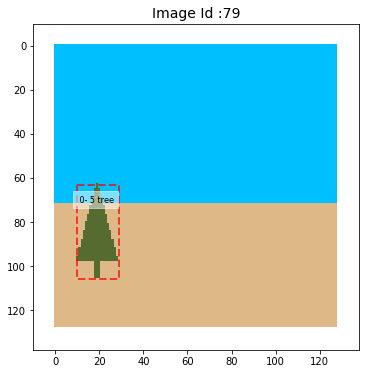

In [371]:
CLASS_ID = 5
cls_name = class_names[CLASS_ID]
print(dataset_test.image_info[image_id]['shapes'])
if len(dataset_test.image_info[image_id]['shapes']) > 0:
    dataset_test.image_info[image_id]['shapes'] = []
    print('deleted')
dataset_test.image_info[image_id]['shapes'].append(new_obj[CLASS_ID])
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
print(dataset_test.image_info[image_id]['shapes'])
print(CY[MIN][cls_name],CY[AVG][cls_name],CY[MAX][cls_name])

In [372]:
CLASS_ID = 5
color = black
for i in [MIN, MAX, AVG]:
    axis_pos[i][CLASS_ID]= {}
    fcn_scores_1[i][CLASS_ID] = {}
    fcn_scores_2[i][CLASS_ID] = {}
    pr_scores[i][CLASS_ID]    = {}
    axis_pos[i][CLASS_ID] , fcn_scores_1[i][CLASS_ID], fcn_scores_2[i][CLASS_ID], pr_scores[CLASS_ID] = move_across_x_axis(image_id, CLASS_ID, color, i, STEP_SIZE =5)

 Image Id   :  79  Class :  5  -  tree  Type:  MIN  Height:  33
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(3, 9), (5, 14), (8, 19), (10, 24), (12, 29)]
0 3 9
1 5 14
2 8 19
3 10 24
4 12 29
 Image Id   :  79  Class :  5  -  tree  Type:  MAX  Height:  98
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(3, 9), (5, 14), (8, 19), (10, 24), (12, 29)]
0 3 9
1 5 14
2 8 19
3 10 24
4 12 29
 Image Id   :  79  Class :  5  -  tree  Type:  AVG  Height:  80
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(3, 9), (5, 14), (8, 19), (10, 24), (12, 29)]
0 3 9
1 5 14
2 8 19
3 10 24
4 12 29


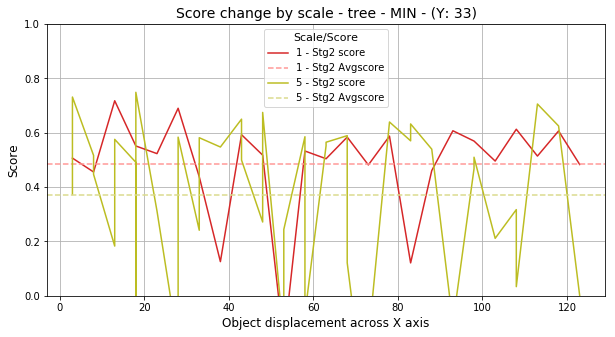

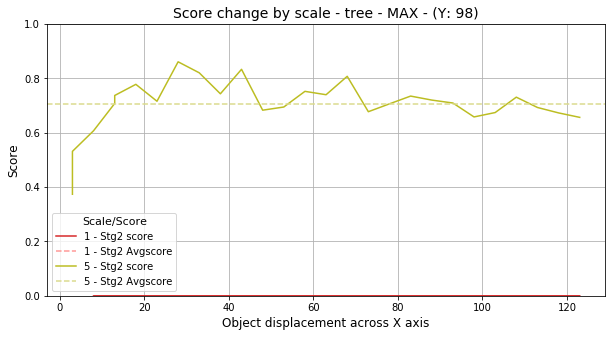

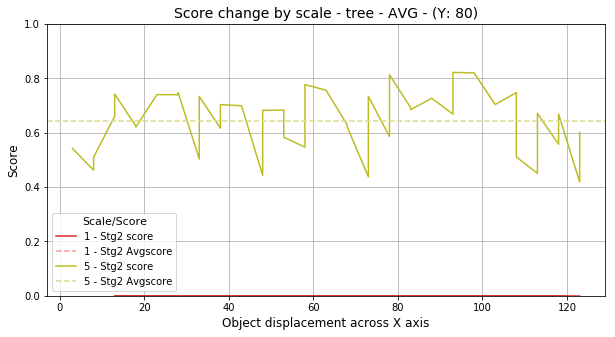

In [373]:
CLASS_ID = 5
cls_name = class_names[CLASS_ID]
scales = [0, 4]
plot  = None
for i in [MIN, MAX, AVG]:
    cls_name = class_names[CLASS_ID]
    ttl = i + ' - (Y: '+ str(CY[i][cls_name])+')'
    vis2.plot_exp6_score_curves(axis_pos[i][CLASS_ID], fcn_scores_1[i][CLASS_ID] , pr_scores[i][CLASS_ID], cls_name, ttl = ttl , scales = scales)

##  Tree - Green

[('tree', (0.0, 0.0, 0.0), (123, 80, 12, 29))]
deleted
[('tree', (85.0, 107.0, 47.0), (19, 84, 9, 21))]
33 80 98


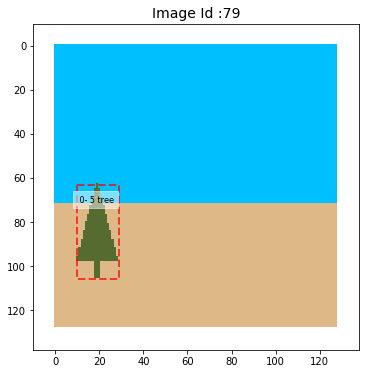

In [374]:
CLASS_ID = 5
cls_name = class_names[CLASS_ID]
print(dataset_test.image_info[image_id]['shapes'])
if len(dataset_test.image_info[image_id]['shapes']) > 0:
    dataset_test.image_info[image_id]['shapes'] = []
    print('deleted')
dataset_test.image_info[image_id]['shapes'].append(new_obj[CLASS_ID])
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
print(dataset_test.image_info[image_id]['shapes'])
print(CY[MIN][cls_name],CY[AVG][cls_name],CY[MAX][cls_name])

In [376]:
CLASS_ID = 5
color = green
for i in [MIN, MAX, AVG]:
    axis_pos[i][CLASS_ID]= {}
    fcn_scores_1[i][CLASS_ID] = {}
    fcn_scores_2[i][CLASS_ID] = {}
    pr_scores[i][CLASS_ID]    = {}
    axis_pos[i][CLASS_ID] , fcn_scores_1[i][CLASS_ID], fcn_scores_2[i][CLASS_ID], pr_scores[CLASS_ID] = move_across_x_axis(image_id, CLASS_ID, color, i, STEP_SIZE =5)

 Image Id   :  79  Class :  5  -  tree  Type:  MIN  Height:  33
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(3, 9), (5, 14), (8, 19), (10, 24), (12, 29)]
0 3 9
1 5 14
2 8 19
3 10 24
4 12 29
 Image Id   :  79  Class :  5  -  tree  Type:  MAX  Height:  98
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(3, 9), (5, 14), (8, 19), (10, 24), (12, 29)]
0 3 9
1 5 14
2 8 19
3 10 24
4 12 29
 Image Id   :  79  Class :  5  -  tree  Type:  AVG  Height:  80
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(3, 9), (5, 14), (8, 19), (10, 24), (12, 29)]
0 3 9
1 5 14
2 8 19
3 10 24
4 12 29


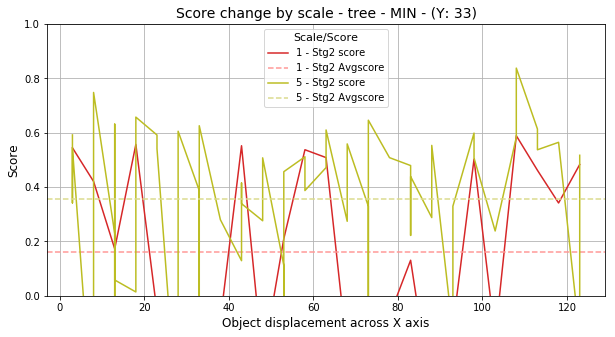

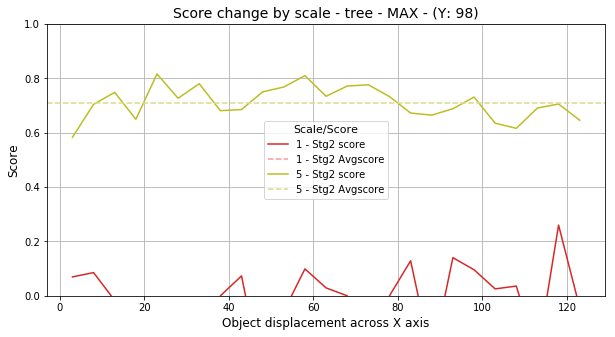

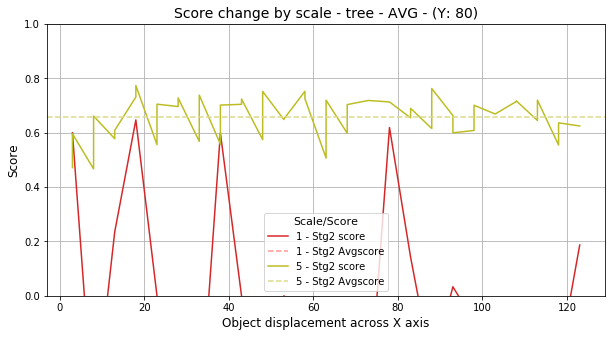

In [377]:
CLASS_ID = 5
cls_name = class_names[CLASS_ID]
scales = [0, 4]
plot  = None
for i in [MIN, MAX, AVG]:
    cls_name = class_names[CLASS_ID]
    ttl = i + ' - (Y: '+ str(CY[i][cls_name])+')'
    vis2.plot_exp6_score_curves(axis_pos[i][CLASS_ID], fcn_scores_1[i][CLASS_ID] , pr_scores[i][CLASS_ID], cls_name, ttl = ttl , scales = scales)

##  Cloud

[('tree', (85.0, 107.0, 47.0), (123, 80, 12, 29))]
deleted
[('cloud', (192.0, 192.0, 192.0), (64, 64, 35, 7))]
10 20 30


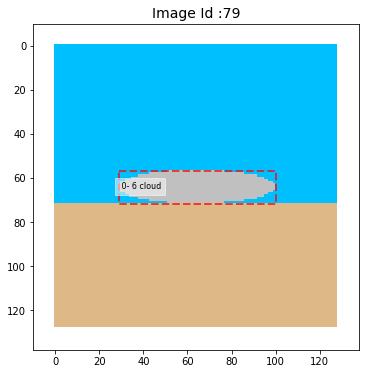

In [378]:
CLASS_ID = 6
cls_name = class_names[CLASS_ID]
print(dataset_test.image_info[image_id]['shapes'])
if len(dataset_test.image_info[image_id]['shapes']) > 0:
    dataset_test.image_info[image_id]['shapes'] = []
    print('deleted')
dataset_test.image_info[image_id]['shapes'].append(new_obj[CLASS_ID])
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
print(dataset_test.image_info[image_id]['shapes'])
print(CY[MIN][cls_name],CY[AVG][cls_name],CY[MAX][cls_name])

In [379]:
CLASS_ID = 6
color = black
for i in [MIN, MAX, AVG]:
    axis_pos[i][CLASS_ID]= {}
    fcn_scores_1[i][CLASS_ID] = {}
    fcn_scores_2[i][CLASS_ID] = {}
    pr_scores[i][CLASS_ID]    = {}
    axis_pos[i][CLASS_ID] , fcn_scores_1[i][CLASS_ID], fcn_scores_2[i][CLASS_ID], pr_scores[CLASS_ID] = move_across_x_axis(image_id, CLASS_ID, color, i, STEP_SIZE=5)

 Image Id   :  79  Class :  6  -  cloud  Type:  MIN  Height:  10
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(10, 3), (20, 5), (30, 9), (40, 10), (50, 12), (60, 12)]
0 10 3
1 20 5
2 30 9
3 40 10
4 50 12
5 60 12
 Image Id   :  79  Class :  6  -  cloud  Type:  MAX  Height:  30
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(10, 3), (20, 5), (30, 9), (40, 10), (50, 12), (60, 12)]
0 10 3
1 20 5
2 30 9
3 40 10
4 50 12
5 60 12
 Image Id   :  79  Class :  6  -  cloud  Type:  AVG  Height:  20
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(10, 3), (20, 5), (30, 9), (40, 10), (50, 12), (60, 12)]
0 10 3
1 20 5
2 30 9
3 40 10
4 50 12
5 60 12


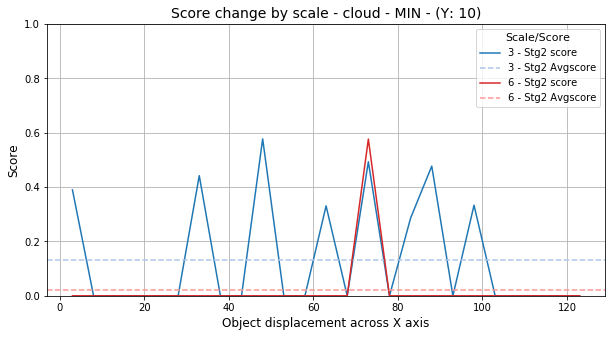

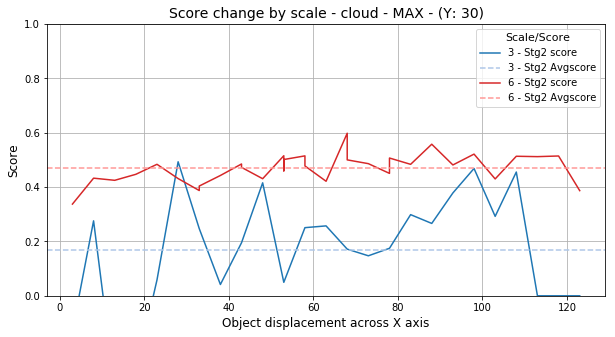

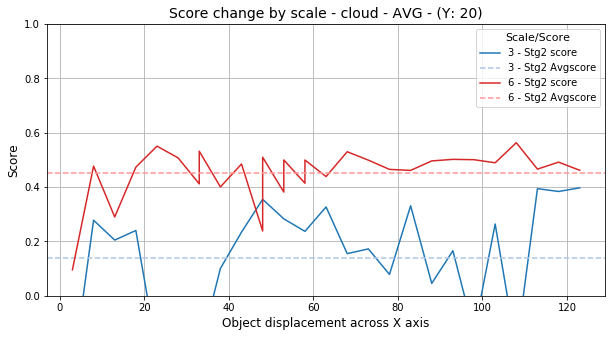

In [421]:
CLASS_ID = 6
cls_name = class_names[CLASS_ID]
scales = [2,5]
# scales = None
plot  = None
for i in [MIN, MAX, AVG]:
    cls_name = class_names[CLASS_ID]
    ttl = i + ' - (Y: '+ str(CY[i][cls_name])+')'
    vis2.plot_exp6_score_curves(axis_pos[i][CLASS_ID], fcn_scores_1[i][CLASS_ID] , pr_scores[i][CLASS_ID], cls_name, ttl = ttl , scales = scales)

##  Airplane

[('cloud', (0.0, 0.0, 0.0), (123, 20, 60, 12))]
deleted
[('airplane', (0.0, 0.0, 0.0), (64, 64, 22, 9))]
20 30 40


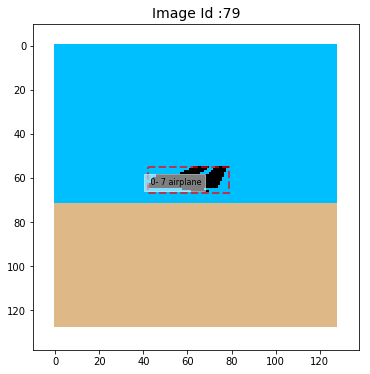

In [382]:
CLASS_ID = 7
cls_name = class_names[CLASS_ID]
print(dataset_test.image_info[image_id]['shapes'])
if len(dataset_test.image_info[image_id]['shapes']) > 0:
    dataset_test.image_info[image_id]['shapes'] = []
    print('deleted')
dataset_test.image_info[image_id]['shapes'].append(new_obj[CLASS_ID])
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
print(dataset_test.image_info[image_id]['shapes'])
print(CY[MIN][cls_name],CY[AVG][cls_name],CY[MAX][cls_name])

In [383]:
CLASS_ID = 7
color = black
for i in [MIN, MAX, AVG]:
    axis_pos[i][CLASS_ID]= {}
    fcn_scores_1[i][CLASS_ID] = {}
    fcn_scores_2[i][CLASS_ID] = {}
    pr_scores[i][CLASS_ID]    = {}
    axis_pos[i][CLASS_ID] , fcn_scores_1[i][CLASS_ID], fcn_scores_2[i][CLASS_ID], pr_scores[CLASS_ID] = move_across_x_axis(image_id, CLASS_ID, color, i, STEP_SIZE=5)

 Image Id   :  79  Class :  7  -  airplane  Type:  MIN  Height:  20
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(16, 6), (18, 7), (21, 8), (24, 9), (26, 10)]
0 16 6
1 18 7
2 21 8
3 24 9
4 26 10
 Image Id   :  79  Class :  7  -  airplane  Type:  MAX  Height:  40
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(16, 6), (18, 7), (21, 8), (24, 9), (26, 10)]
0 16 6
1 18 7
2 21 8
3 24 9
4 26 10
 Image Id   :  79  Class :  7  -  airplane  Type:  AVG  Height:  30
 Move from X:  3  to:  127  step:  5
 Sizes      :  [(16, 6), (18, 7), (21, 8), (24, 9), (26, 10)]
0 16 6
1 18 7
2 21 8
3 24 9
4 26 10


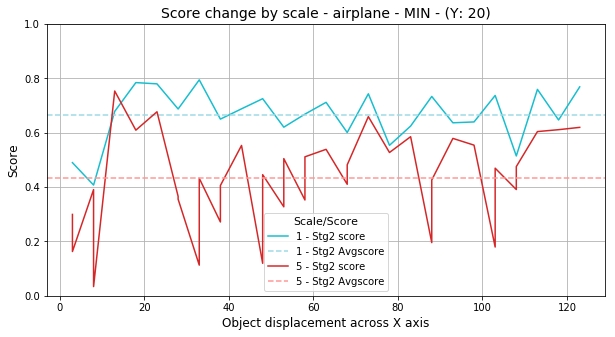

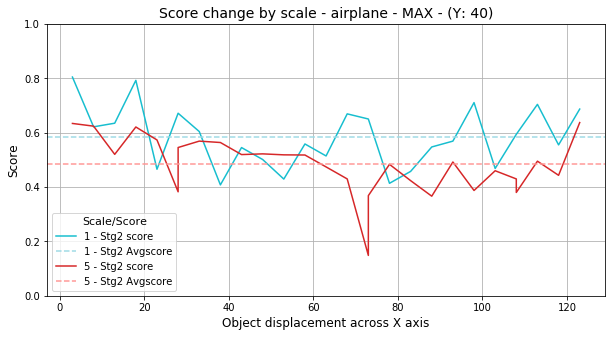

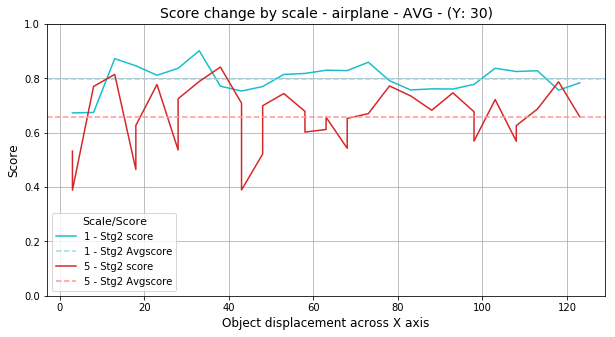

In [392]:
CLASS_ID = 7
cls_name = class_names[CLASS_ID]
scales = [0,4]
# scales = None
plot  = None
for i in [MIN, MAX, AVG]:
    cls_name = class_names[CLASS_ID]
    ttl = i + ' - (Y: '+ str(CY[i][cls_name])+')'
    vis2.plot_exp6_score_curves(axis_pos[i][CLASS_ID], fcn_scores_1[i][CLASS_ID] , pr_scores[i][CLASS_ID], cls_name, ttl = ttl , scales = scales)

##  Truck

[('truck', (0.0, 0.0, 0.0), (46, 101, 33, 11))]
deleted
[('truck', (0.0, 0.0, 0.0), (46, 101, 33, 11))]
70 90 110


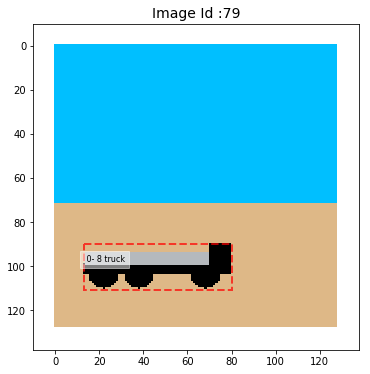

In [387]:
CLASS_ID = 8
cls_name = class_names[CLASS_ID]
print(dataset_test.image_info[image_id]['shapes'])
if len(dataset_test.image_info[image_id]['shapes']) > 0:
    dataset_test.image_info[image_id]['shapes'] = []
    print('deleted')
dataset_test.image_info[image_id]['shapes'].append(new_obj[CLASS_ID])
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
print(dataset_test.image_info[image_id]['shapes'])
print(CY[MIN][cls_name],CY[AVG][cls_name],CY[MAX][cls_name])

 Image Id   :  79  Class :  8  -  truck  Type:  MIN  Height:  70
 Move from X:  3  to:  127  step:  3
 Sizes      :  [(21, 7), (27, 9), (33, 10), (39, 11), (45, 11), (51, 12), (56, 14)]
0 21 7
1 27 9
2 33 10
3 39 11
4 45 11
5 51 12


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


6 56 14
 Image Id   :  79  Class :  8  -  truck  Type:  MAX  Height:  110
 Move from X:  3  to:  127  step:  3
 Sizes      :  [(21, 7), (27, 9), (33, 10), (39, 11), (45, 11), (51, 12), (56, 14)]
0 21 7
1 27 9
2 33 10
3 39 11
4 45 11
5 51 12
6 56 14
 Image Id   :  79  Class :  8  -  truck  Type:  AVG  Height:  90
 Move from X:  3  to:  127  step:  3
 Sizes      :  [(21, 7), (27, 9), (33, 10), (39, 11), (45, 11), (51, 12), (56, 14)]
0 21 7
1 27 9
2 33 10
3 39 11
4 45 11
5 51 12
6 56 14


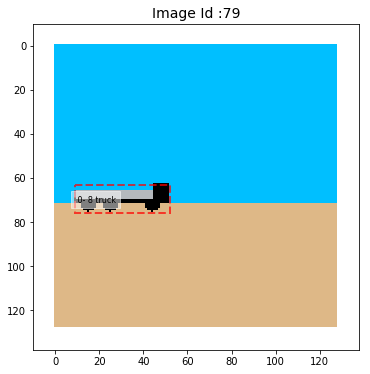

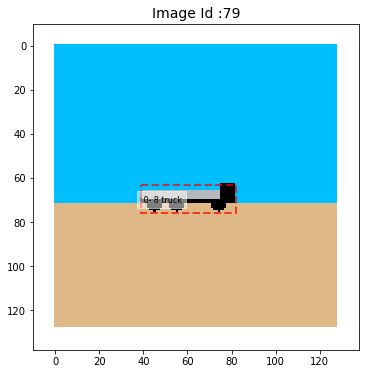

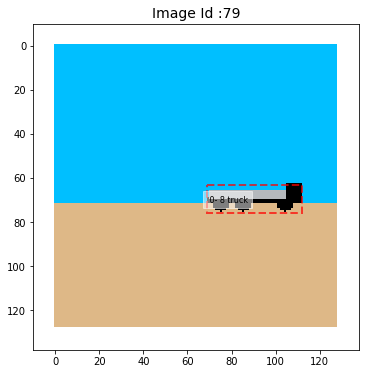

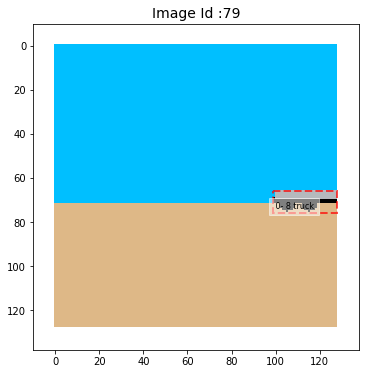

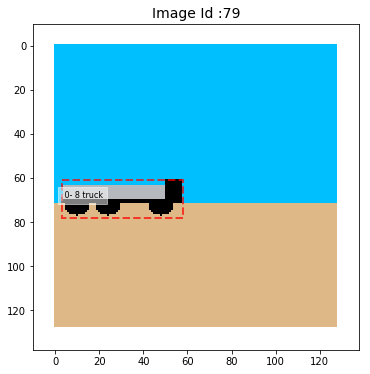

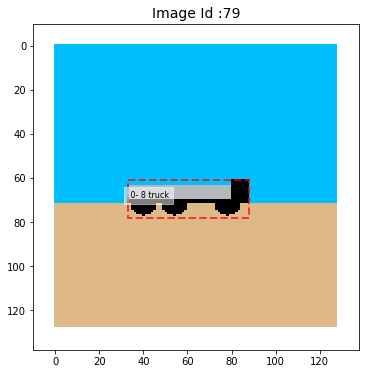

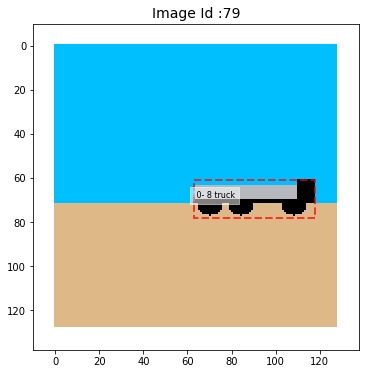

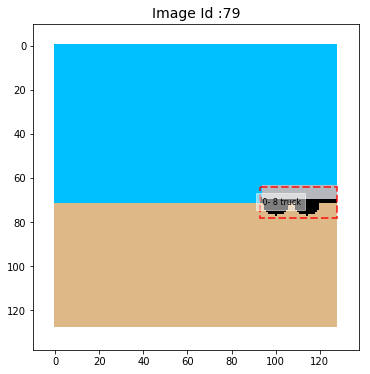

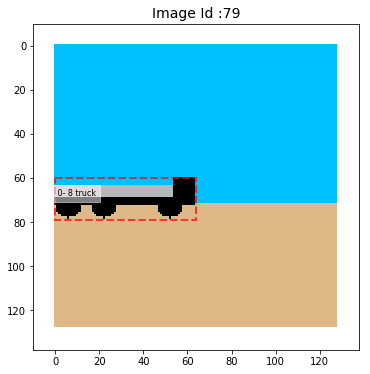

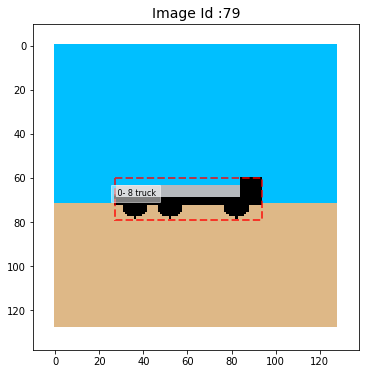

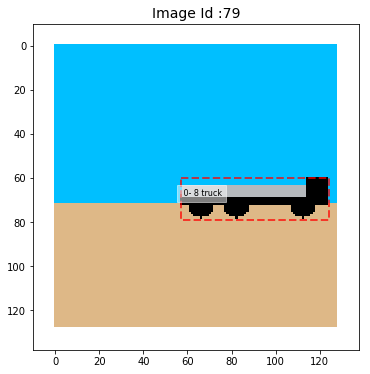

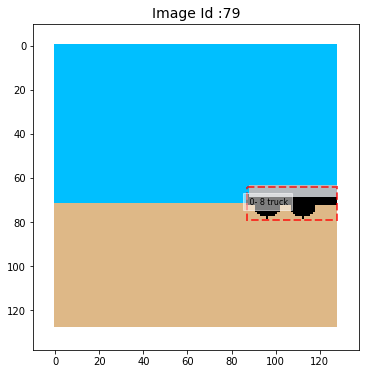

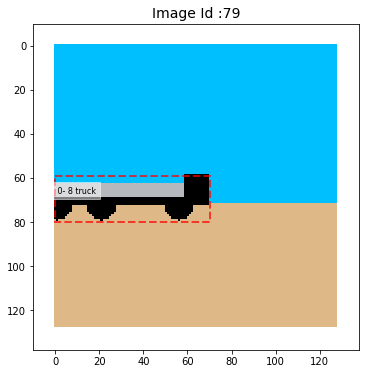

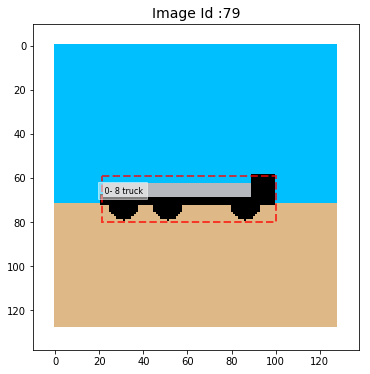

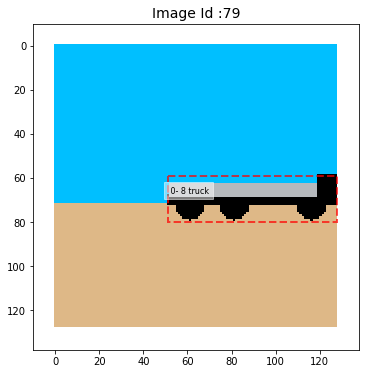

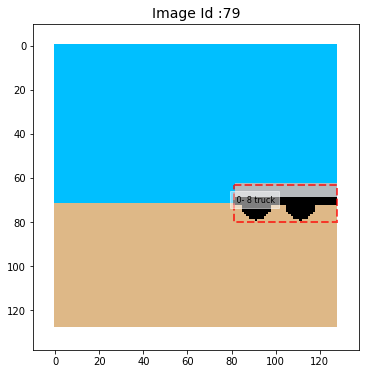

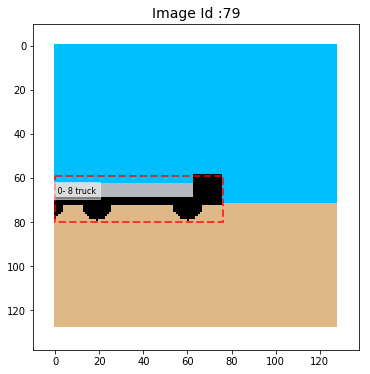

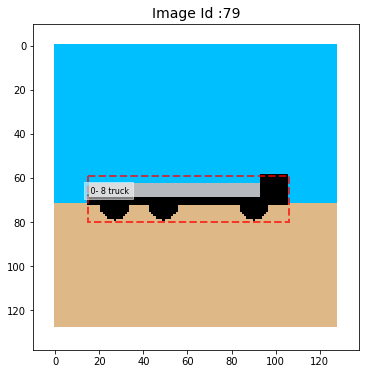

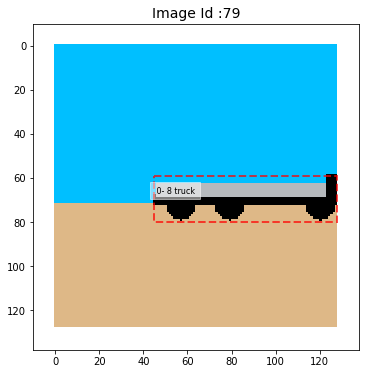

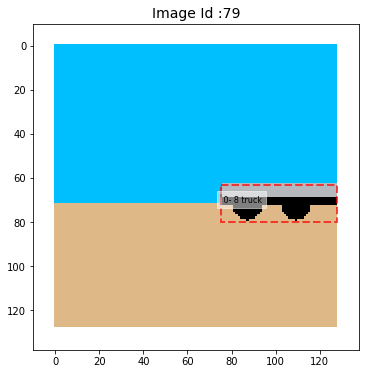

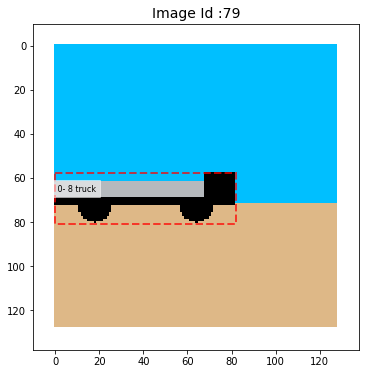

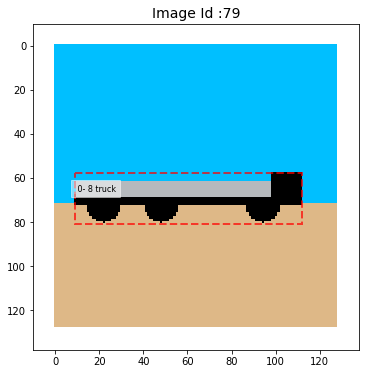

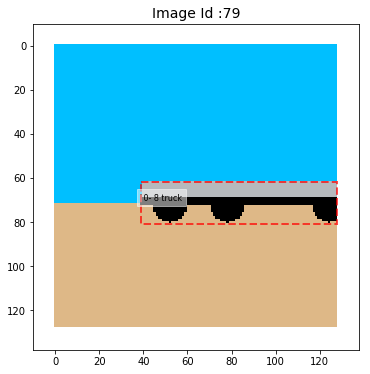

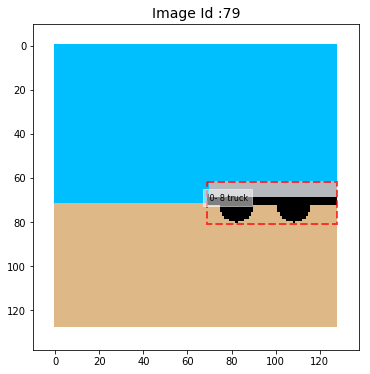

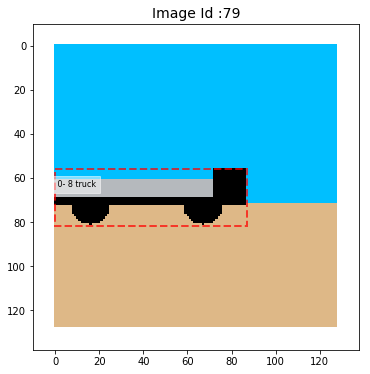

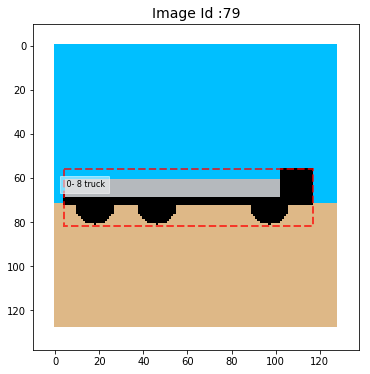

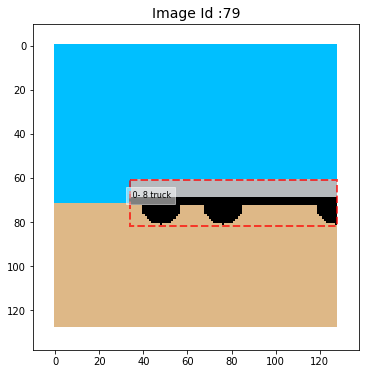

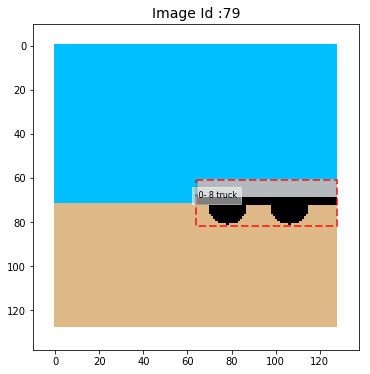

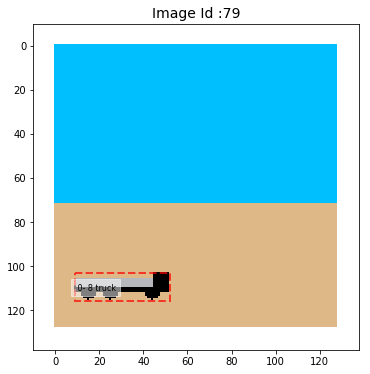

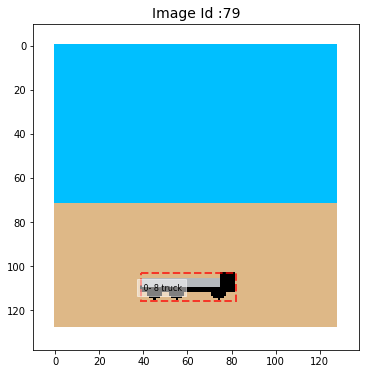

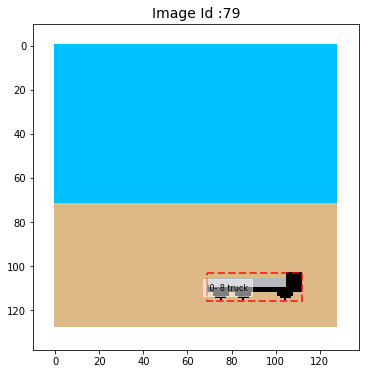

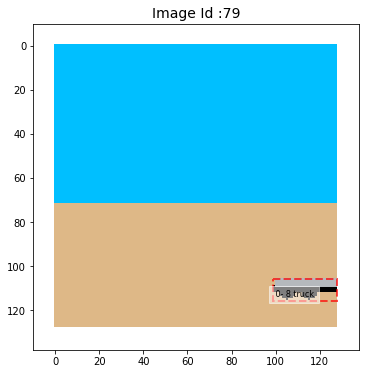

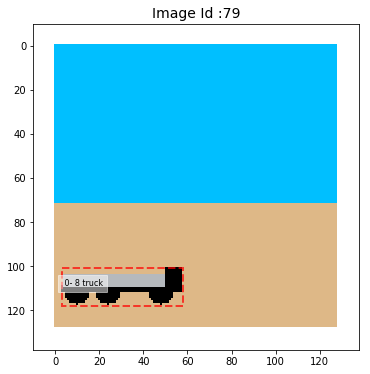

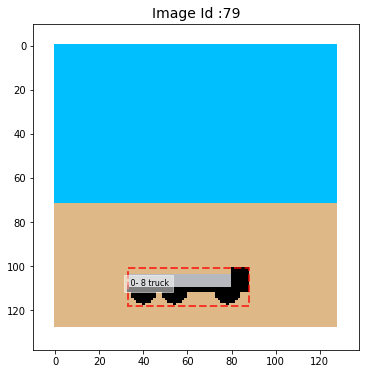

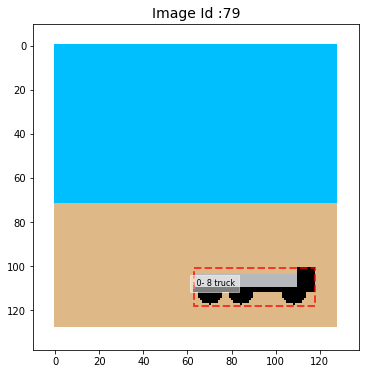

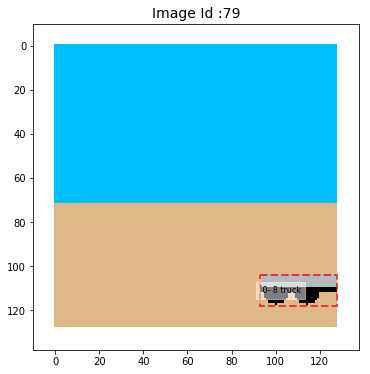

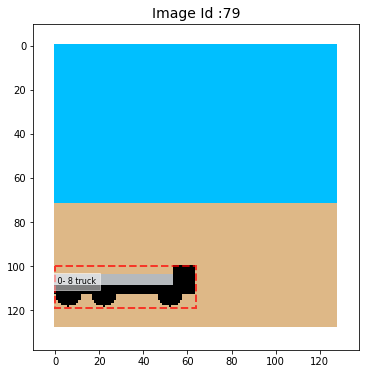

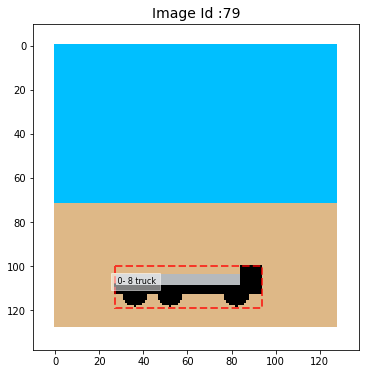

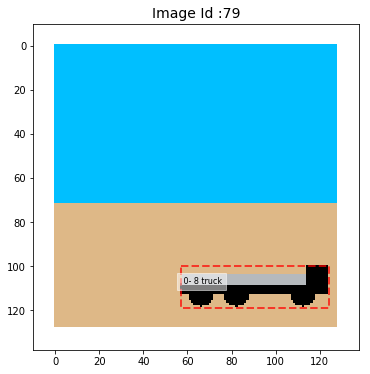

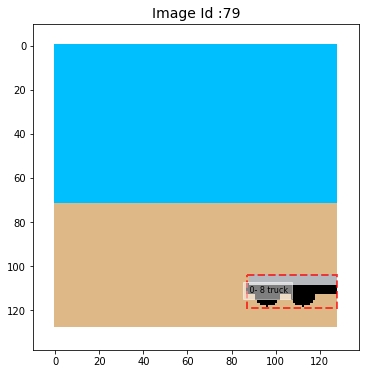

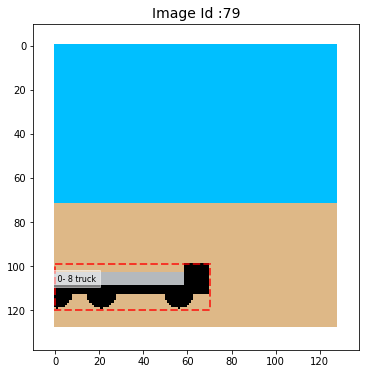

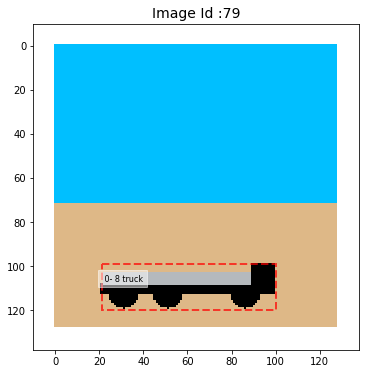

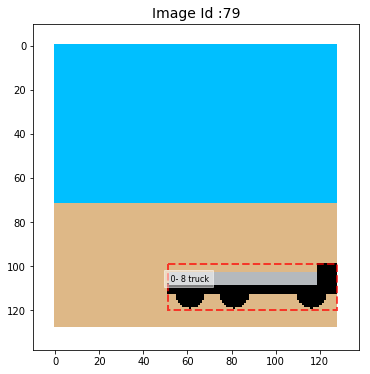

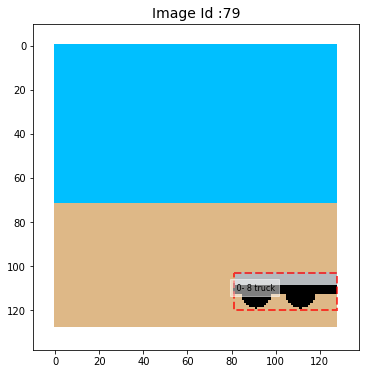

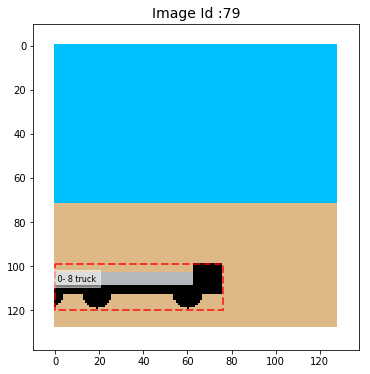

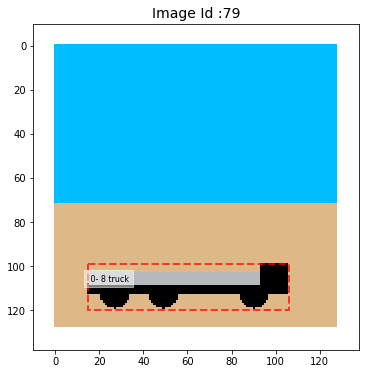

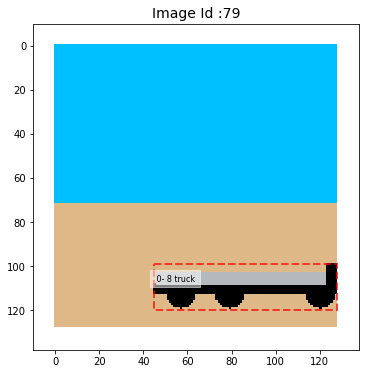

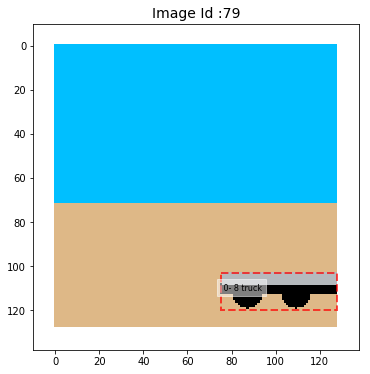

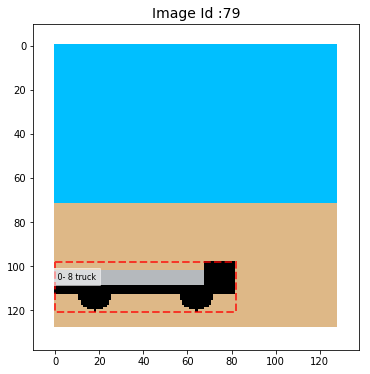

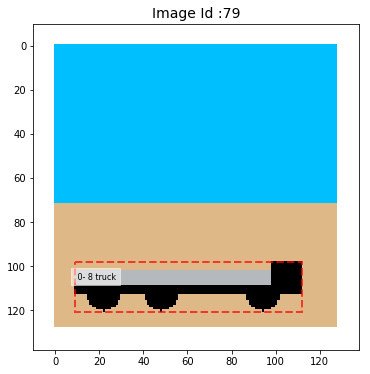

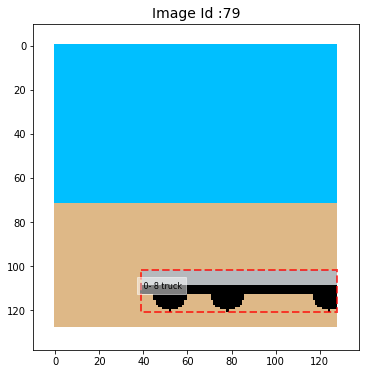

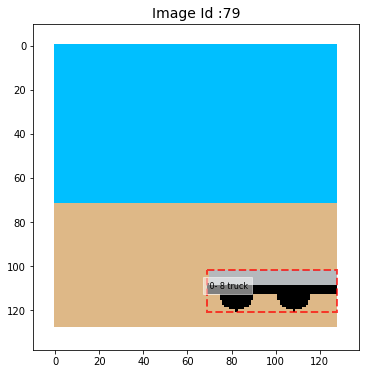

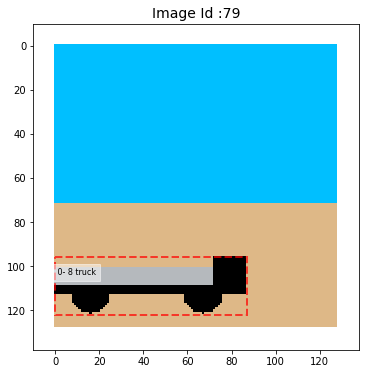

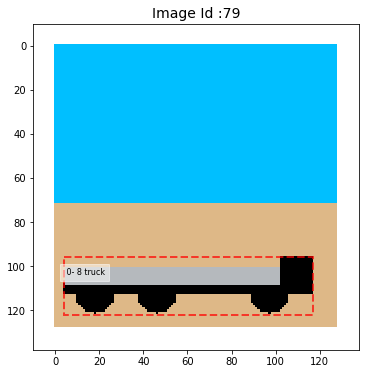

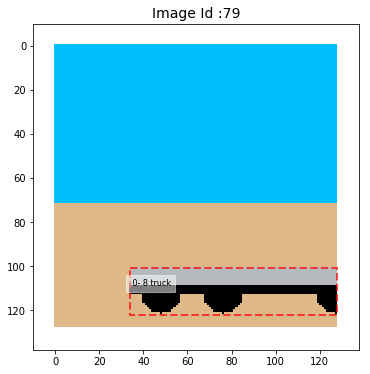

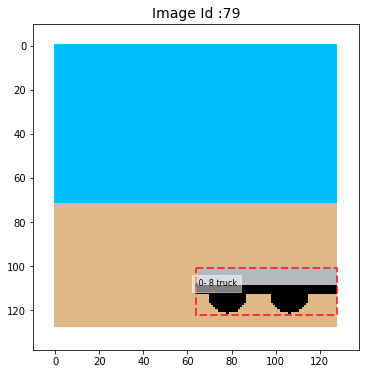

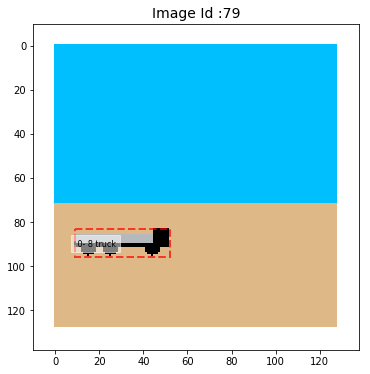

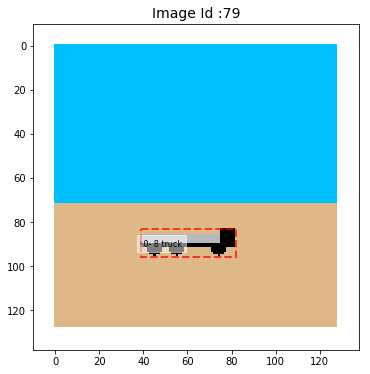

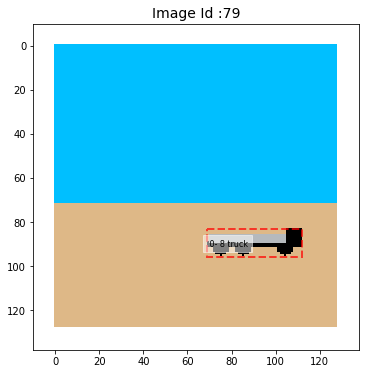

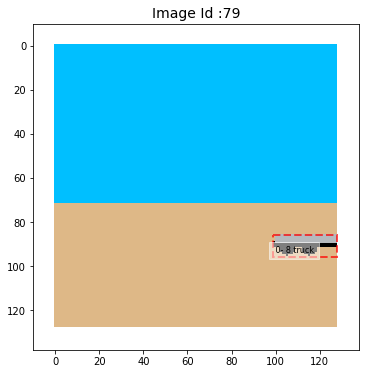

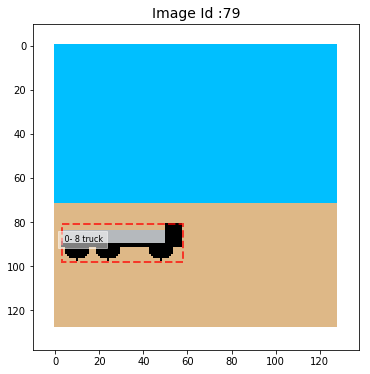

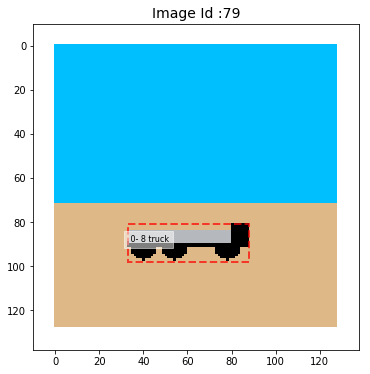

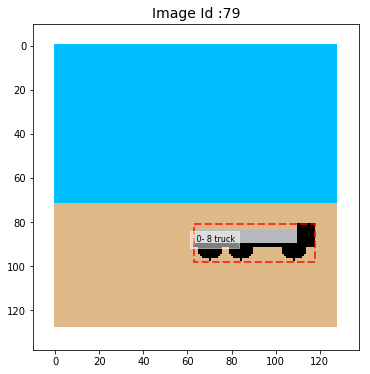

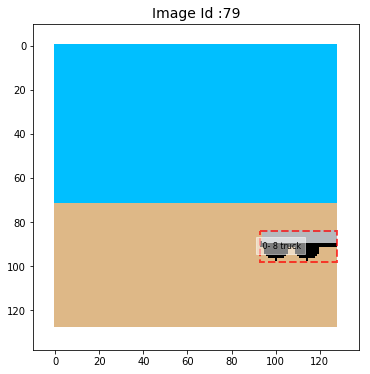

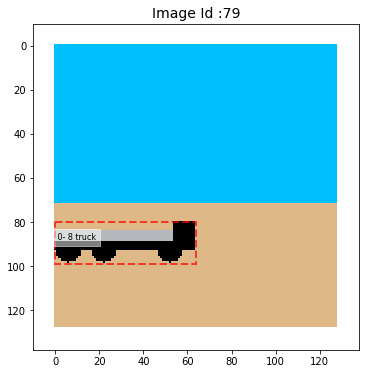

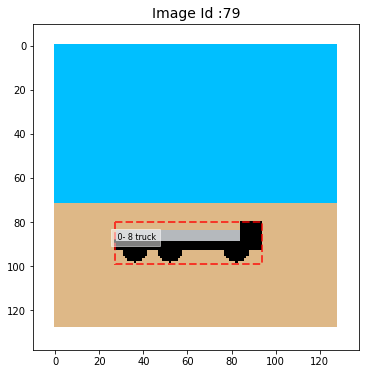

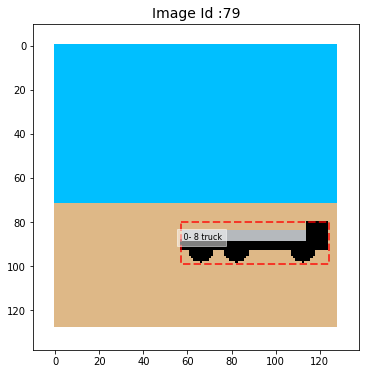

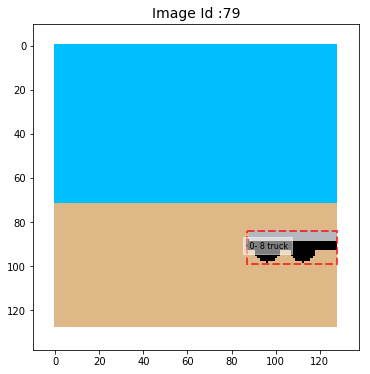

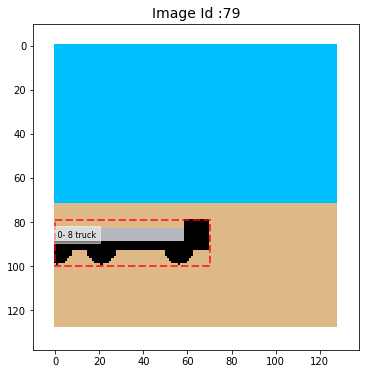

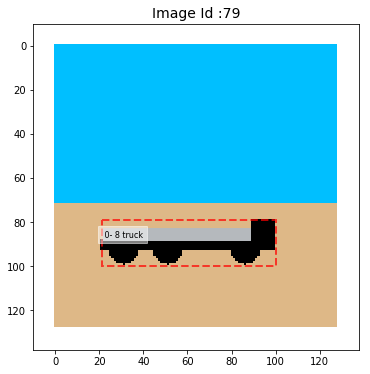

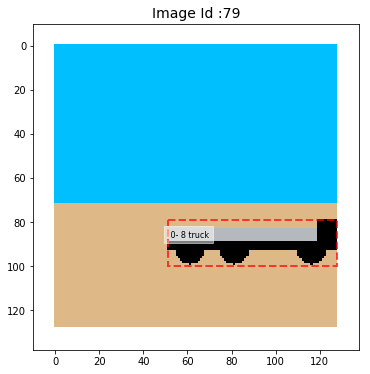

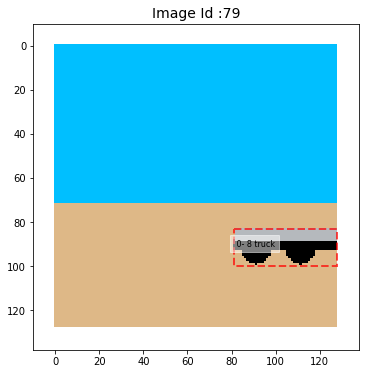

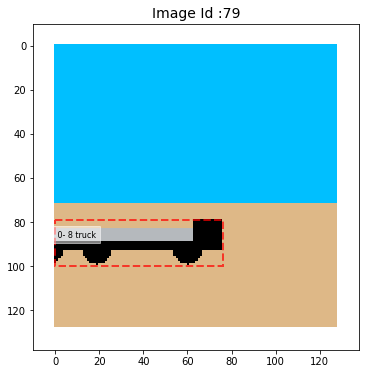

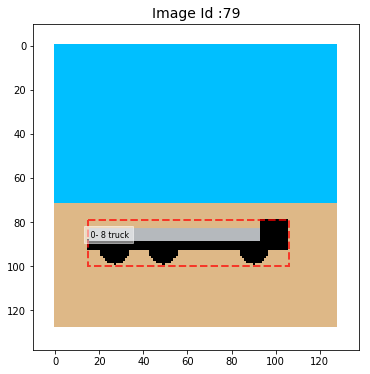

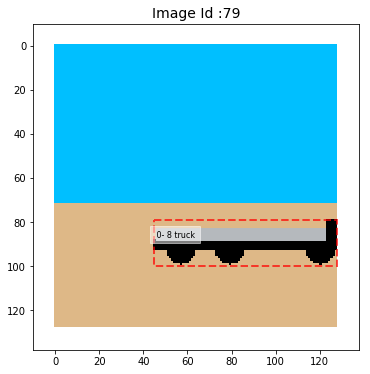

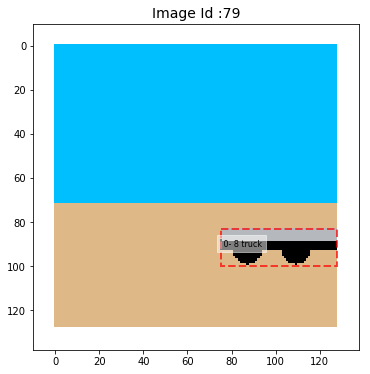

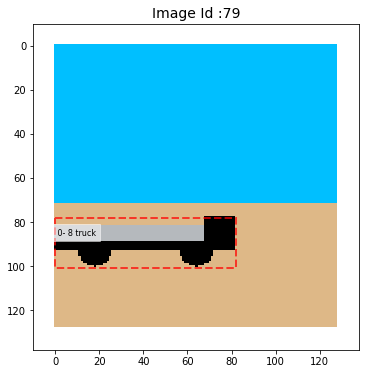

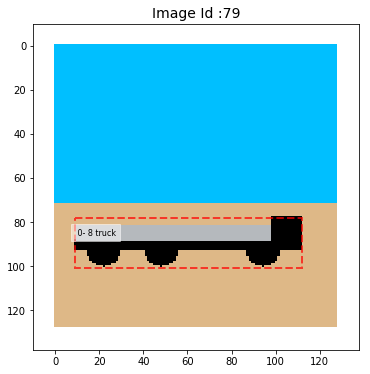

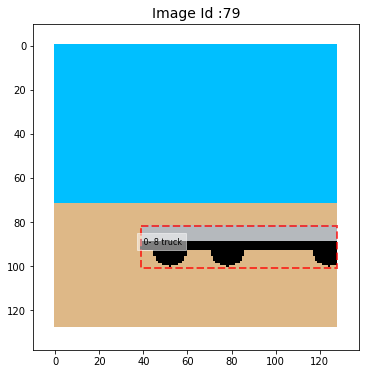

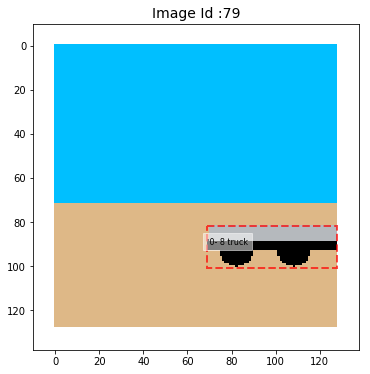

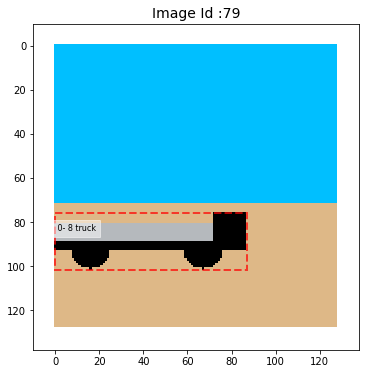

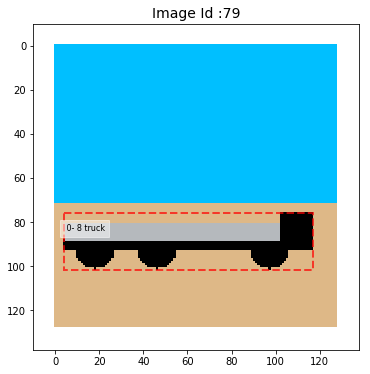

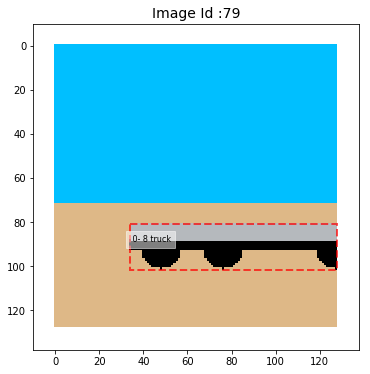

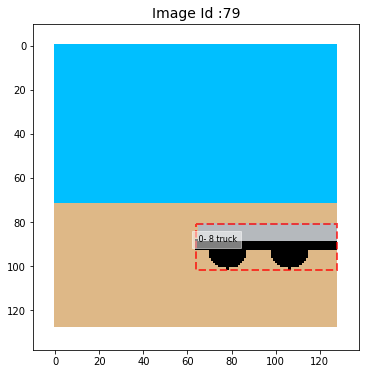

In [388]:
CLASS_ID = 8
color = black
for i in [MIN, MAX, AVG]:
    axis_pos[i][CLASS_ID]= {}
    fcn_scores_1[i][CLASS_ID] = {}
    fcn_scores_2[i][CLASS_ID] = {}
    pr_scores[i][CLASS_ID]    = {}
    axis_pos[i][CLASS_ID] , fcn_scores_1[i][CLASS_ID], fcn_scores_2[i][CLASS_ID], pr_scores[CLASS_ID] = move_across_x_axis(image_id, CLASS_ID, color, i, verbose = True)

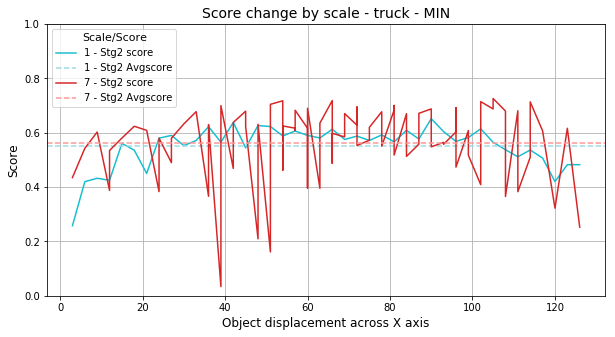

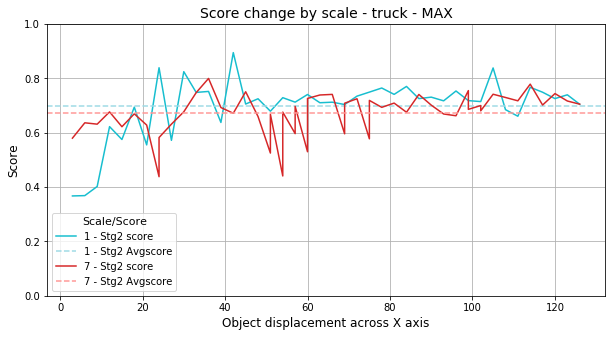

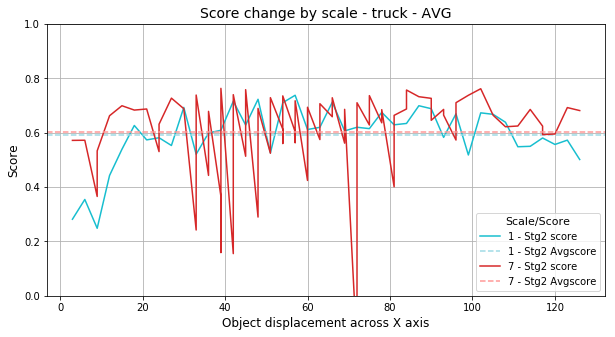

In [391]:
CLASS_ID = 8
cls_name = class_names[CLASS_ID]
scales = [0,6]
plot  = None
for i in [MIN, MAX, AVG]:
    vis2.plot_exp6_score_curves(axis_pos[i][CLASS_ID], fcn_scores_1[i][CLASS_ID] , pr_scores[i][CLASS_ID], class_names[CLASS_ID], ttl = i , scales = scales, plot= plot)

## Save to pickle file 

In [ ]:
import pickle
print(save_path)

In [232]:
save_path = "/home/kbardool/git_projs/mrcnn3/train_newshapes_2/other"
epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
mrcnn_epochs = mrcnn_files[MRCNN_FILE_IDX].split('_')[1].replace('.h5','')

exp_prfx = 'exp6'
exp_desc = 'spatial_extent'
save_file =  exp_prfx+'_i'+str(image_id)+'_e'+epochs+'_m'+mrcnn_epochs+'_'+exp_desc
print(' SAVED FILENAME:', save_file)

 SAVED FILENAME: exp6_i79_e0266_m0020_spatial_extent


In [234]:
##------------------------------------------------------------------------
## Save AP_Results, Cls_info, pr_bboxes dictionaries

##------------------------------------------------------------------------
data = [axis_pos, fcn_scores_1  , fcn_scores_2 , pr_scores]
with open(os.path.join(save_path, save_file + '.pkl'), 'wb') as outfile:
    pickle.dump( data, outfile)
print('      to ----> ', save_path,'    Filename: ', save_file)

      to ---->  /home/kbardool/git_projs/mrcnn3/train_newshapes_2/other     Filename:  exp6_i79_e0266_m0020_spatial_extent


In [231]:
print(axis_pos[MIN].keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8])
